
# Rotating Machine Fault Classification - Exploratory Data Analysis
## Following Course Methodology

### Passo 1 - Carregar Dados
Carregar dados de sinais el√©tricos e vibra√ß√£o de m√°quinas rotativas

Verificar valores, tipos e estrutura dos dados

Verificar dados faltantes e balanceamento das classes

TODO:

comentar os graficos 

escolher os atributos que fazem mais sentidos

ver se a corelacoes fazem sentido

filttrar/normalizar se necessario

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('Dataset APS1_Sinais Eletricos e Vibracao_csv.xls')


In [162]:
df.head()


tempo_s  tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
0     0.00         0.0      0.44905     63.67320    1.43660   
1     0.08         0.0      0.44610     69.40320    1.67860   
2     0.16         0.0      0.45175     69.11385    1.39950   
3     0.24         0.0      0.43510     68.85665    1.39705   
4     0.32         0.0      0.45055     70.52860    1.43375   

   DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
0             0.042740             21.869566            0.113479   
1             0.048945              1.600020            0.854342   
2             0.042337              5.220348            0.284000   
3             0.063224              3.437546            0.219507   
4             0.048497              1.240032            0.111967   

   Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
0            0.175           91.738          0.406             12.474475   
1            0.227            7.359          3.843             20.070610   
2            0.207           24.185          1.395             19.087723   
3            0.228           16.040          0.973              6.869051   
4            0.222            4.394          0.425             20.205840   

   Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  Mag_S1_f2_dBrms  \
0             15.435837            4.223108       -50.647991       -63.189443   
1             13.335535           16.966677       -50.696943       -63.340003   
2              7.345771           11.032327       -47.724322       -62.837371   
3             19.849528            9.136137       -47.652608       -62.613368   
4              2.325535            2.818658       -47.019446       -61.314274   

   Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  Mag_S2_f3_dBrms  
0       -47.864704       -59.629807       -73.010381       -49.583755  
1       -48.313132       -59.591150       -72.360239       -49.473893  
2       -48.384219       -55.194912       -63.127903       -48.083630  
3       -48.768793       -55.275822       -63.310116       -47.937933  
4       -49.016646       -54.665312       -60.825200       -47.886619

In [163]:
print(f"Shape: {df.shape}")
print(f"N√∫mero de amostras: {df.shape[0]}")
print(f"N√∫mero de colunas: {df.shape[1]}")


Shape: (2505, 20)
N√∫mero de amostras: 2505
N√∫mero de colunas: 20


In [164]:
missing_values = df.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_values)
if missing_values.sum() == 0:
    print("‚úì N√£o h√° valores faltantes no dataset!")


Valores faltantes por coluna:
tempo_s                 0
tipo_setup              0
I_entrada_A             0
P_entrada_W             0
I_saida_A               0
DesvPad_I_entrada_A     0
DesvPad _P_entrada_W    0
DesvPad _I_saida_A      0
Amp_I_entrada_A         0
Amp_P_entrada_W         0
Amp_I_saida_A           0
Kurtosis_I_entrada_A    0
Kurtosis_P_entrada_W    0
Kurtosis_I_saida_A      0
Mag_S1_f1_dBrms         0
Mag_S1_f2_dBrms         0
Mag_S1_f3_dBrms         0
Mag_S2_f1_dBrms         0
Mag_S2_f2_dBrms         0
Mag_S2_f3_dBrms         0
dtype: int64
‚úì N√£o h√° valores faltantes no dataset!


In [165]:
class_counts = df['tipo_setup'].value_counts().sort_index()
print("Distribui√ß√£o das classes:")
for class_id, count in class_counts.items():
    print(f"  Classe {int(class_id)}: {count} amostras ({count/len(df)*100:.1f}%)")

# Verificar se o dataset est√° balanceado
is_balanced = len(class_counts.unique()) == 1
print(f"Dataset balanceado: {'‚úì Sim' if is_balanced else '‚úó N√£o'}")


Distribui√ß√£o das classes:
  Classe 0: 501 amostras (20.0%)
  Classe 1: 501 amostras (20.0%)
  Classe 2: 501 amostras (20.0%)
  Classe 3: 501 amostras (20.0%)
  Classe 4: 501 amostras (20.0%)
Dataset balanceado: ‚úì Sim


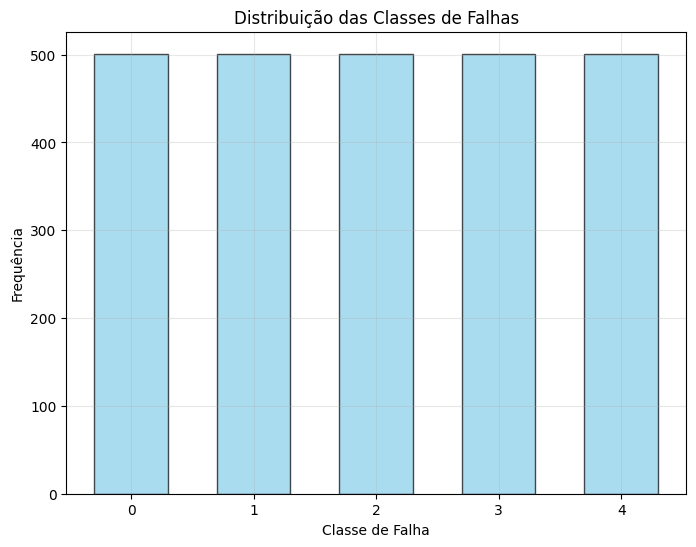

In [166]:
plt.figure(figsize=(8, 6))
class_counts = df['tipo_setup'].value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values, alpha=0.7, color='skyblue', 
        edgecolor='black', width=0.6)
plt.title('Distribui√ß√£o das Classes de Falhas')
plt.xlabel('Classe de Falha')
plt.ylabel('Frequ√™ncia')
plt.xticks([0, 1, 2, 3, 4])
plt.grid(True, alpha=0.3)
plt.show()

In [167]:
df.head(10)

tempo_s  tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
0     0.00         0.0      0.44905     63.67320    1.43660   
1     0.08         0.0      0.44610     69.40320    1.67860   
2     0.16         0.0      0.45175     69.11385    1.39950   
3     0.24         0.0      0.43510     68.85665    1.39705   
4     0.32         0.0      0.45055     70.52860    1.43375   
5     0.40         0.0      0.45780     72.12370    1.64435   
6     0.48         0.0      0.45665     67.13660    1.56650   
7     0.56         0.0      0.46855     68.28150    1.42010   
8     0.64         0.0      0.46805     70.12305    1.46285   
9     0.72         0.0      0.45150     70.46765    1.85890   

   DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
0             0.042740             21.869566            0.113479   
1             0.048945              1.600020            0.854342   
2             0.042337              5.220348            0.284000   
3             0.063224              3.437546            0.219507   
4             0.048497              1.240032            0.111967   
5             0.049214              1.037477            0.727560   
6             0.031887             12.565748            0.823614   
7             0.139621              5.431692            0.129738   
8             0.051746              0.543396            0.212010   
9             0.050280              0.995491            1.263191   

   Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
0            0.175           91.738          0.406             12.474475   
1            0.227            7.359          3.843             20.070610   
2            0.207           24.185          1.395             19.087723   
3            0.228           16.040          0.973              6.869051   
4            0.222            4.394          0.425             20.205840   
5            0.268            3.965          2.901             19.733265   
6            0.135           57.515          3.872              9.631977   
7            0.741           26.435          0.424             10.827122   
8            0.295            1.893          1.008             12.100309   
9            0.217            3.965          4.183             11.533168   

   Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  Mag_S1_f2_dBrms  \
0             15.435837            4.223108       -50.647991       -63.189443   
1             13.335535           16.966677       -50.696943       -63.340003   
2              7.345771           11.032327       -47.724322       -62.837371   
3             19.849528            9.136137       -47.652608       -62.613368   
4              2.325535            2.818658       -47.019446       -61.314274   
5              4.201291           10.761748       -45.442220       -55.648148   
6             21.907203           21.479692       -45.488704       -56.009613   
7             21.559988            3.354328       -45.695884       -56.248508   
8              2.229543           10.067876       -45.816182       -56.544124   
9              4.174269            8.071069       -45.966467       -56.952812   

   Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  Mag_S2_f3_dBrms  
0       -47.864704       -59.629807       -73.010381       -49.583755  
1       -48.313132       -59.591150       -72.360239       -49.473893  
2       -48.384219       -55.194912       -63.127903       -48.083630  
3       -48.768793       -55.275822       -63.310116       -47.937933  
4       -49.016646       -54.665312       -60.825200       -47.886619  
5       -48.120426       -53.857686       -54.091117       -47.796733  
6       -48.238176       -54.170722       -54.533745       -47.558322  
7       -48.605394       -54.524769       -54.941720       -47.285231  
8       -48.907357       -54.935360       -55.395529       -47.511850  
9       -49.355602       -55.346473       -55.839678       -47.592548

In [168]:
df.tail(10)

tempo_s  tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
2495    39.28         4.0      0.45310     72.93975    1.41230   
2496    39.36         4.0      0.45685     69.45855    1.42105   
2497    39.44         4.0      0.44580     64.83420    1.41890   
2498    39.52         4.0      0.46650     69.04955    1.63010   
2499    39.60         4.0      0.46400     72.07715    1.56470   
2500    39.68         4.0      0.46575     68.42795    1.59235   
2501    39.76         4.0      0.44705     62.32815    1.57365   
2502    39.84         4.0      0.47110     76.04075    1.77275   
2503    39.92         4.0      0.47745     72.86850    1.39700   
2504    40.00         4.0      0.48705     70.70715    1.51215   

      DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
2495             0.139288              4.642627            0.548626   
2496             0.067191              8.440546            0.130558   
2497             0.060788             15.296240            0.140316   
2498             0.027117              1.540961            0.691242   
2499             0.064213             14.766315            0.912505   
2500             0.042147              8.058820            0.900427   
2501             0.068987             15.876663            0.904702   
2502             0.045194             34.799709            1.657858   
2503             0.043033              0.826486            0.131019   
2504             0.114987             12.366981            0.514260   

      Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
2495            0.731           21.542          2.783             11.927464   
2496            0.347           36.402          0.551              6.968719   
2497            0.196           68.697          0.538              6.191738   
2498            0.129            6.788          3.061             21.648562   
2499            0.308           89.024          4.502              6.509324   
2500            0.199           37.403          4.276              5.486469   
2501            0.231           62.159          4.218              5.237910   
2502            0.191          184.906          7.810              9.874863   
2503            0.194            2.893          0.383             21.320253   
2504            0.608           41.761          2.476             10.119385   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
2495             22.161540           18.918135       -32.601970   
2496             15.816190            7.570950       -32.624414   
2497             19.594616            2.884057       -32.723686   
2498              5.433971           14.220737       -32.861428   
2499             11.631509           21.072072       -33.035220   
2500             22.266532           21.582764       -33.195195   
2501             11.518238           21.593782       -33.360763   
2502             20.660427            6.075266       -33.497896   
2503              2.327027            1.904577       -33.581380   
2504              6.899001           20.098625       -33.599577   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
2495       -54.171586       -42.211742       -37.882920       -48.411716   
2496       -53.643372       -41.487348       -37.754360       -48.333979   
2497       -53.185541       -41.059078       -37.699228       -48.171282   
2498       -52.800685       -41.006217       -37.703468       -48.421369   
2499       -52.381092       -41.237712       -37.771560       -48.852786   
2500       -52.502279       -41.610532       -37.874381       -49.147213   
2501       -52.868492       -42.054637       -37.995903       -49.251871   
2502       -53.300911       -42.289221       -38.129107       -48.947030   
2503       -53.601503       -42.527074       -38.258422       -48.618126   
2504       -53.697702       -42.686179       -38.335583       -48.344164   

      Mag_S2_f3_dBrms  
2495       -41.647851  
2496

In [169]:
feature_columns = [col for col in df.columns if col not in ['tempo_s', 'tipo_setup']]
df[feature_columns].describe()


I_entrada_A  P_entrada_W    I_saida_A  DesvPad_I_entrada_A  \
count  2505.000000  2505.000000  2505.000000          2505.000000   
mean      0.467173    71.095485     1.510273             0.062549   
std       0.037798     6.369966     0.138248             0.057536   
min       0.261900    38.470250     0.810650             0.001372   
25%       0.445700    67.307950     1.419950             0.041017   
50%       0.456750    69.612150     1.479250             0.056569   
75%       0.472450    73.029150     1.590750             0.070714   
max       0.625950    96.651550     2.118200             0.860274   

       DesvPad _P_entrada_W  DesvPad _I_saida_A  Amp_I_entrada_A  \
count           2505.000000         2505.000000      2505.000000   
mean              10.030840            0.495564         0.280475   
std               11.105669            0.375317         0.269268   
min                0.543396            0.063909         0.005000   
25%                2.689081            0.154070         0.183000   
50%                8.407893            0.377251         0.244000   
75%               12.983316            0.879553         0.302000   
max              149.491667            2.007972         3.881000   

       Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
count      2505.000000    2505.000000           2505.000000   
mean         46.371912       2.225988             12.050777   
std          52.036291       1.767510              5.230828   
min           1.893000       0.244000              1.660392   
25%          12.789000       0.596000              7.971048   
50%          38.618000       1.745000             10.701860   
75%          58.301000       4.108000             15.927991   
max         672.213000      10.687000             22.979158   

       Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
count           2505.000000         2505.000000      2505.000000   
mean              14.937885           11.168255       -39.983011   
std                6.931692            7.207961         4.949400   
min                1.325033            1.187931       -50.696943   
25%                9.554414            4.030760       -43.902336   
50%               16.355427            9.754281       -41.943547   
75%               21.599938           18.540216       -34.647596   
max               22.994930           22.794465       -31.993773   

       Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
count      2505.000000      2505.000000      2505.000000      2505.000000   
mean        -54.772230       -47.535366       -45.145129       -55.583079   
std           9.313107         5.857693         6.269441         9.072283   
min         -71.520216       -58.985078       -65.271484       -73.010381   
25%         -59.541521       -52.053099       -50.245276       -63.067057   
50%         -54.967319       -47.868026       -48.353184       -59.158229   
75%         -50.619857       -41.947513       -37.978948       -49.267334   
max         -37.605394       -36.684861       -35.173001       -37.765710   

       Mag_S2_f3_dBrms  
count      2505.000000  
mean        -46.578764  
std           3.855181  
min         -54.985263  
25%         -49.493122  
50%         -47.233461  
75%         -42.830915  
max         -38.495491

### Passo 2 - Explora√ß√£o e Visualiza√ß√£o
Explora√ß√£o e visualiza√ß√£o dos dados multidimensionais


In [170]:
import seaborn as sns

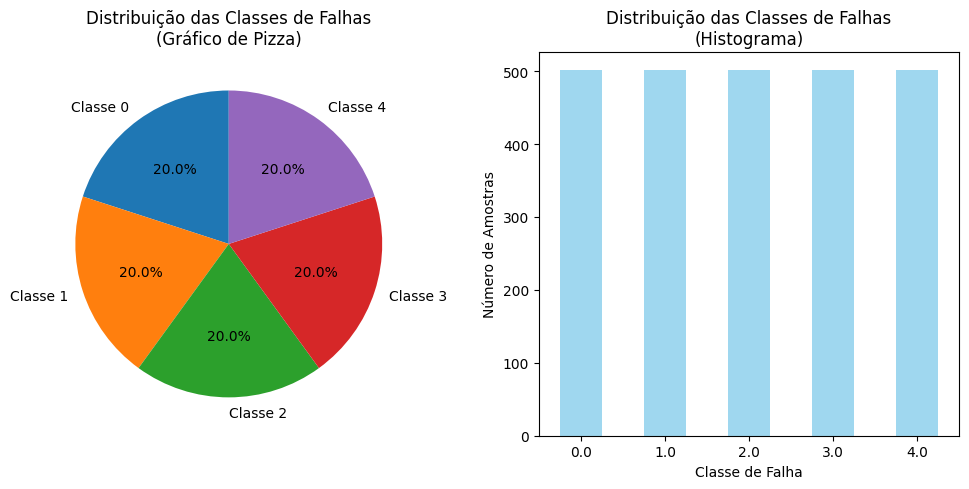

In [171]:
# 1. Gr√°fico de pizza das classes
class_distribution = df['tipo_setup'].value_counts().sort_index()

plt.figure(figsize=(10, 5))

# Subplot 1: Gr√°fico de pizza
plt.subplot(1, 2, 1)
plt.pie(class_distribution, labels=[f'Classe {int(i)}' for i in class_distribution.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribui√ß√£o das Classes de Falhas\n(Gr√°fico de Pizza)')

# Subplot 2: Histograma
plt.subplot(1, 2, 2)
class_distribution.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribui√ß√£o das Classes de Falhas\n(Histograma)')
plt.xlabel('Classe de Falha')
plt.ylabel('N√∫mero de Amostras')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### O que o gr√°fico mostra
- Cada barra representa uma classe de falha (0 a 4).
- As frequ√™ncias s√£o praticamente iguais (cerca de 500 amostras por classe).

### Insight principal
- O dataset est√° **balanceado** entre todas as classes
- Isso √© positivo, pois **evita vi√©s do modelo** em favor das classes mais frequentes.
- Assim, podemos usar m√©tricas padr√£o de classifica√ß√£o (accuracy, F1-score) sem precisar corrigir desbalanceamento (ex.: oversampling, undersampling, class weights).

### Implica√ß√µes para o modelo
- O treinamento n√£o precisar√° de t√©cnicas de reamostragem.
- A avalia√ß√£o ser√° **mais justa e representativa** para todas as classes, j√° que nenhuma delas domina.
- Isso tamb√©m refor√ßa que usar **macro-F1** √© adequado, porque todas as classes t√™m o mesmo peso de import√¢ncia e est√£o igualmente representadas.

### Conclus√£o
O gr√°fico confirma que o dataset foi constru√≠do de forma **experimentalmente equilibrada**, o que facilita a an√°lise e aumenta a confiabilidade dos resuldados do classificador.

In [172]:
# 2. Estat√≠sticas descritivas individuais para algumas caracter√≠sticas importantes
# Selecionar caracter√≠sticas mais importantes baseadas no conhecimento do dom√≠nio
important_features = [
    'I_entrada_A',           # Corrente de entrada
    'P_entrada_W',           # Pot√™ncia de entrada  
    'I_saida_A',             # Corrente de sa√≠da
    'Mag_S1_f1_dBrms',       # Magnitude sensor 1, freq 1
    'Mag_S2_f1_dBrms'        # Magnitude sensor 2, freq 1
]

for feature in important_features:
    print(f"\n--- {feature} ---")
    print(f"M√©dia: {df[feature].mean():.4f}")
    print(f"Mediana: {df[feature].median():.4f}")
    print(f"Desvio-padr√£o: {df[feature].std():.4f}")
    print(f"Vari√¢ncia: {df[feature].var():.4f}")
    print(f"Obliquidade (Skewness): {df[feature].skew():.4f}")
    print(f"Curtose (Kurtosis): {df[feature].kurtosis():.4f}")



--- I_entrada_A ---
M√©dia: 0.4672
Mediana: 0.4567
Desvio-padr√£o: 0.0378
Vari√¢ncia: 0.0014
Obliquidade (Skewness): 1.0416
Curtose (Kurtosis): 2.1548

--- P_entrada_W ---
M√©dia: 71.0955
Mediana: 69.6121
Desvio-padr√£o: 6.3700
Vari√¢ncia: 40.5765
Obliquidade (Skewness): 0.8265
Curtose (Kurtosis): 1.3957

--- I_saida_A ---
M√©dia: 1.5103
Mediana: 1.4792
Desvio-padr√£o: 0.1382
Vari√¢ncia: 0.0191
Obliquidade (Skewness): 0.6522
Curtose (Kurtosis): 2.2895

--- Mag_S1_f1_dBrms ---
M√©dia: -39.9830
Mediana: -41.9435
Desvio-padr√£o: 4.9494
Vari√¢ncia: 24.4966
Obliquidade (Skewness): 0.2375
Curtose (Kurtosis): -1.4428

--- Mag_S2_f1_dBrms ---
M√©dia: -45.1451
Mediana: -48.3532
Desvio-padr√£o: 6.2694
Vari√¢ncia: 39.3059
Obliquidade (Skewness): 0.2637
Curtose (Kurtosis): -1.6358


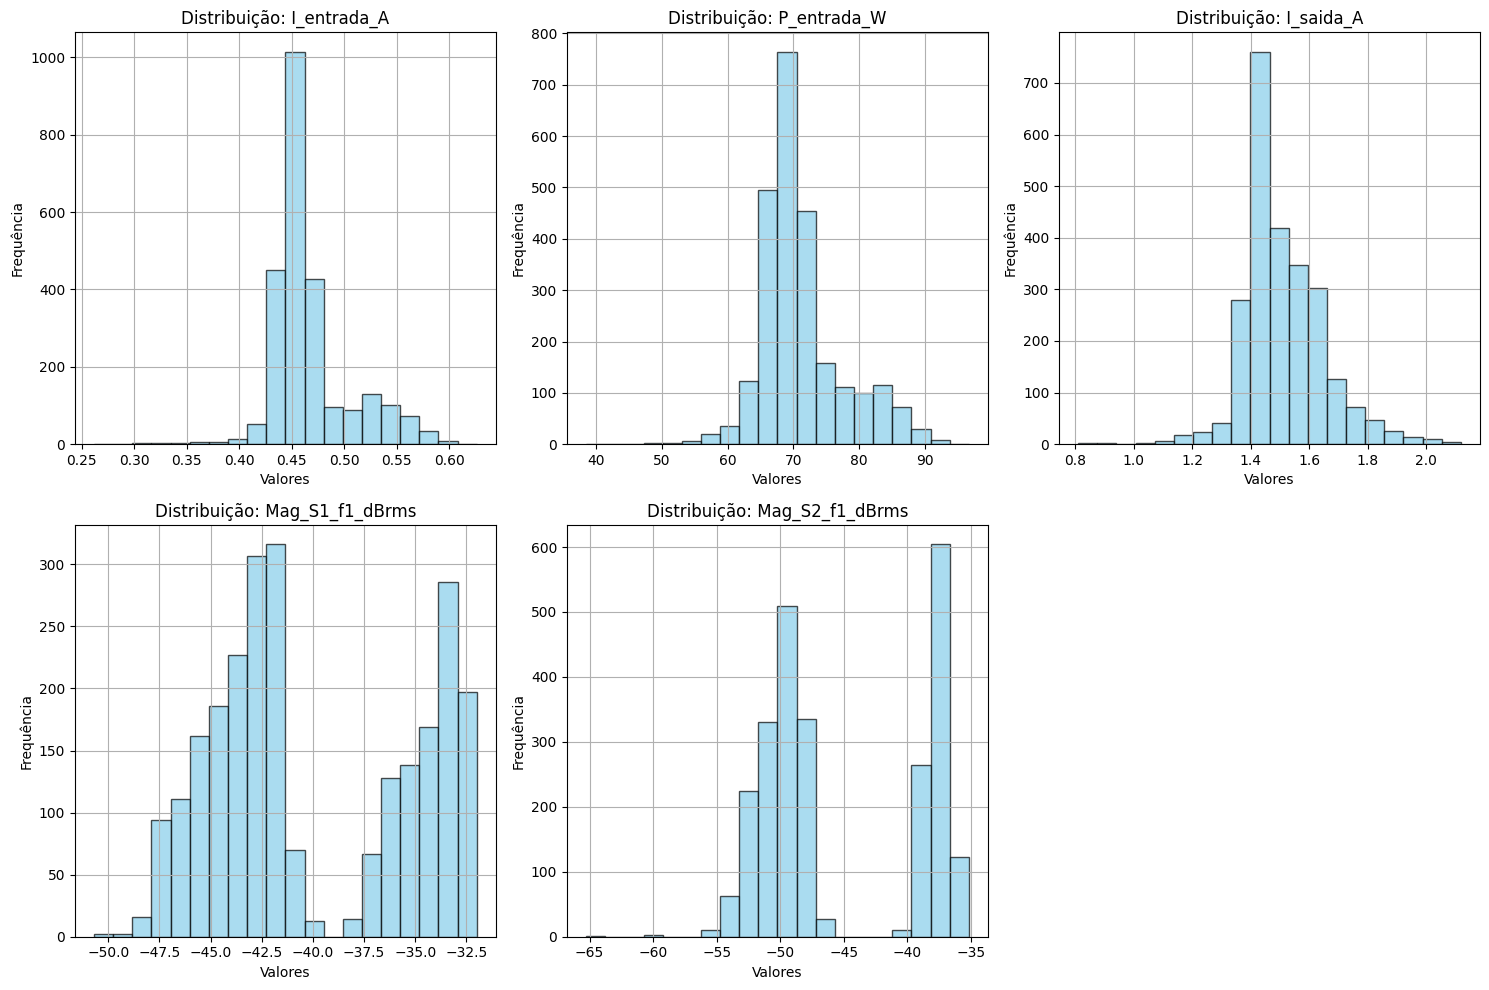

In [173]:
# 3. Histogramas para distribui√ß√£o das caracter√≠sticas
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    df[feature].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribui√ß√£o: {feature}')
    plt.xlabel('Valores')
    plt.ylabel('Frequ√™ncia')

plt.tight_layout()
plt.show()


### An√°lise dos gr√°ficos

### El√©tricas (I_entrada_A, P_entrada_W, I_sa√≠da_A)

- Mostram distribui√ß√µes concentradas (quase normais).
- **P_entrada_W** tem maior dispers√£o e √© o melhor indicador de **sobrecarga**.
- **I_entrada_A** acompanha P_entrada, mas com menos variabilidade.
- **I_sa√≠da_A** apresenta distribui√ß√£o normal, mas pouco poder discriminativo entre classes.

### Vibra√ß√£o (Mag_S1_f1, Mag_S2_f1)

- Ambas apresentam distribui√ß√µes **bimodais**, refletindo grupos distintos de opera√ß√£o.
- Relacionam-se diretamente √†s falhas mec√¢nicas (d**esbalanceado e desalinhado**).
- Como s√£o fortemente correlacionadas, pode ser redundante manter as duas ‚Üí sele√ß√£o de atributos pode escolher apenas uma.

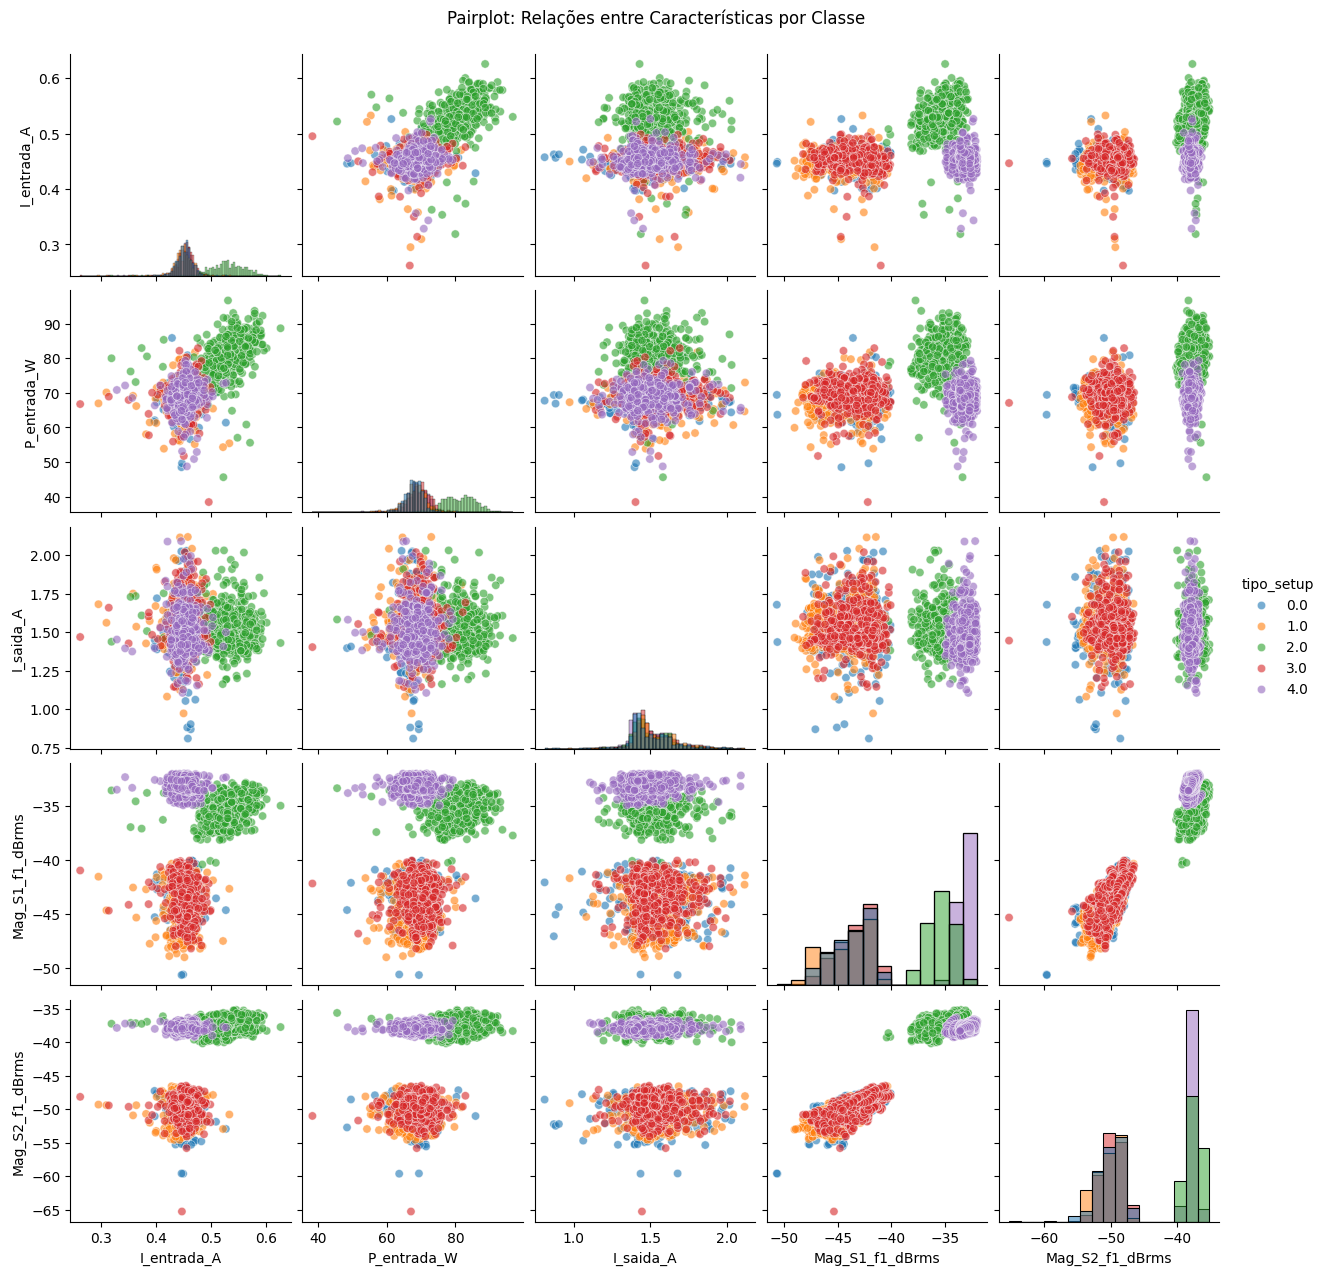

In [174]:
# 4. Pairplot (gr√°fico de pares) - vers√£o simplificada com caracter√≠sticas selecionadas
# Criar dataframe com caracter√≠sticas selecionadas + classe
selected_features = important_features + ['tipo_setup']
df_selected = df[selected_features].copy()

# Converter tipo_setup para string para melhor visualiza√ß√£o
df_selected['tipo_setup'] = df_selected['tipo_setup'].astype(str)

# Pairplot com matiz das classes
sns.pairplot(df_selected, hue='tipo_setup', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Rela√ß√µes entre Caracter√≠sticas por Classe', y=1.02)
plt.show()


### Coment√°rios do Pairplot

### Separa√ß√£o por vibra√ß√£o
- As vari√°veis **Mag_S1_f1_dBrms** e **Mag_S2_f1_dBrms** apresentam os agrupamentos mais evidentes.
- As classes **3 (Desbalanceado)** e **4 (Desalinhado)** ficam bem destacadas, com clusters vis√≠veis e pouco sobrepostos com as demais.
- Isso confirma que as medidas de vibra√ß√£o s√£o os melhores atributos para **detec√ß√£o de falhas mec√¢nicas**.

### Sobrecarga (classe 2)
- Em **P_entrada_W**, observa-se que a classe 2 (vermelha) se concentra em valores mais altos, diferenciando-se das demais.
- Isso refor√ßa que a pot√™ncia el√©trica √© a principal vari√°vel para identificar **sobrecarga**.

### Corrente de sa√≠da

- **I_saida_A** mostra grande sobreposi√ß√£o entre classes, com pouca separa√ß√£o clara.
- Indica baixo poder discriminativo isolado, devendo ser avaliada em combina√ß√£o com outros atributos.

### Rela√ß√µes cruzadas

- O cruzamento de **vari√°veis el√©tricas (I_entrada, P_entrada)** com **vari√°veis de vibra√ß√£o** mostra que as duas fam√≠lias de atributos s√£o **complementares**:

    - El√©tricas ‚Üí ajudam na distin√ß√£o de sobrecarga.

    - Vibra√ß√£o ‚Üí separam falhas mec√¢nicas.

- Essa complementaridade √© positiva para o modelo, pois cobre diferentes tipos de falha.

In [175]:
# 5. Matriz de correla√ß√£o
correlation_matrix = df[feature_columns].corr()
print("Matriz de correla√ß√£o:")
correlation_matrix


Matriz de correla√ß√£o:


I_entrada_A  P_entrada_W  I_saida_A  \
I_entrada_A              1.000000     0.719286  -0.009146   
P_entrada_W              0.719286     1.000000   0.011448   
I_saida_A               -0.009146     0.011448   1.000000   
DesvPad_I_entrada_A     -0.283939    -0.032126   0.035570   
DesvPad _P_entrada_W     0.027581    -0.232482   0.018817   
DesvPad _I_saida_A      -0.000582     0.004686   0.608378   
Amp_I_entrada_A         -0.234529    -0.030039   0.036167   
Amp_P_entrada_W          0.029099    -0.197346   0.020772   
Amp_I_saida_A            0.000591     0.008355   0.491845   
Kurtosis_I_entrada_A     0.045065    -0.009965   0.022333   
Kurtosis_P_entrada_W    -0.021274    -0.066356   0.020482   
Kurtosis_I_saida_A       0.001925     0.012752   0.298787   
Mag_S1_f1_dBrms          0.396516     0.380039  -0.068854   
Mag_S1_f2_dBrms          0.657333     0.621145  -0.037738   
Mag_S1_f3_dBrms          0.536371     0.498193  -0.056669   
Mag_S2_f1_dBrms          0.512556     0.482315  -0.057696   
Mag_S2_f2_dBrms          0.682278     0.641204  -0.041312   
Mag_S2_f3_dBrms          0.484288     0.452760  -0.060476   

                      DesvPad_I_entrada_A  DesvPad _P_entrada_W  \
I_entrada_A                     -0.283939              0.027581   
P_entrada_W                     -0.032126             -0.232482   
I_saida_A                        0.035570              0.018817   
DesvPad_I_entrada_A              1.000000              0.078424   
DesvPad _P_entrada_W             0.078424              1.000000   
DesvPad _I_saida_A              -0.005509             -0.016855   
Amp_I_entrada_A                  0.982845              0.070191   
Amp_P_entrada_W                  0.073503              0.988617   
Amp_I_saida_A                   -0.015266             -0.020780   
Kurtosis_I_entrada_A             0.128158             -0.062415   
Kurtosis_P_entrada_W             0.021183              0.367969   
Kurtosis_I_saida_A              -0.024591             -0.000906   
Mag_S1_f1_dBrms                 -0.003263             -0.005416   
Mag_S1_f2_dBrms                  0.014118              0.018336   
Mag_S1_f3_dBrms                  0.004396              0.012865   
Mag_S2_f1_dBrms                  0.001262              0.013335   
Mag_S2_f2_dBrms                  0.012457              0.016239   
Mag_S2_f3_dBrms                 -0.001320              0.015576   

                      DesvPad _I_saida_A  Amp_I_entrada_A  Amp_P_entrada_W  \
I_entrada_A                    -0.000582        -0.234529         0.029099   
P_entrada_W                     0.004686        -0.030039        -0.197346   
I_saida_A                       0.608378         0.036167         0.020772   
DesvPad_I_entrada_A            -0.005509         0.982845         0.073503   
DesvPad _P_entrada_W           -0.016855         0.070191         0.988617   
DesvPad _I_saida_A              1.000000         0.000250        -0.013511   
Amp_I_entrada_A                 0.000250         1.000000         0.066135   
Amp_P_entrada_W                -0.013511         0.066135         1.000000   
Amp_I_saida_A                   0.968639        -0.009154        -0.016215   
Kurtosis_I_entrada_A            0.048581         0.205262        -0.056422   
Kurtosis_P_entrada_W           -0.008676         0.014474         0.389564   
Kurtosis_I_saida_A              0.609174        -0.023768         0.003151   
Mag_S1_f1_dBrms                 0.004507        -0.000307        -0.004449   
Mag_S1_f2_dBrms                 0.006813         0.016603         0.017108   
Mag_S1_f3_dBrms                 0.004996         0.008646         0.011933   
Mag_S2_f1_dBrms                 0.000810         0.004117         0.012875   
Mag_S2_f2_dBrms                -0.003024         0.014768         0.014564   
Mag_S2_f3_dBrms                -0.006234         0.003343         0.014131   

                      Amp_I_saida_A  Kurtosis_I_entrada_A  \
I_entrada_A                0.000591         

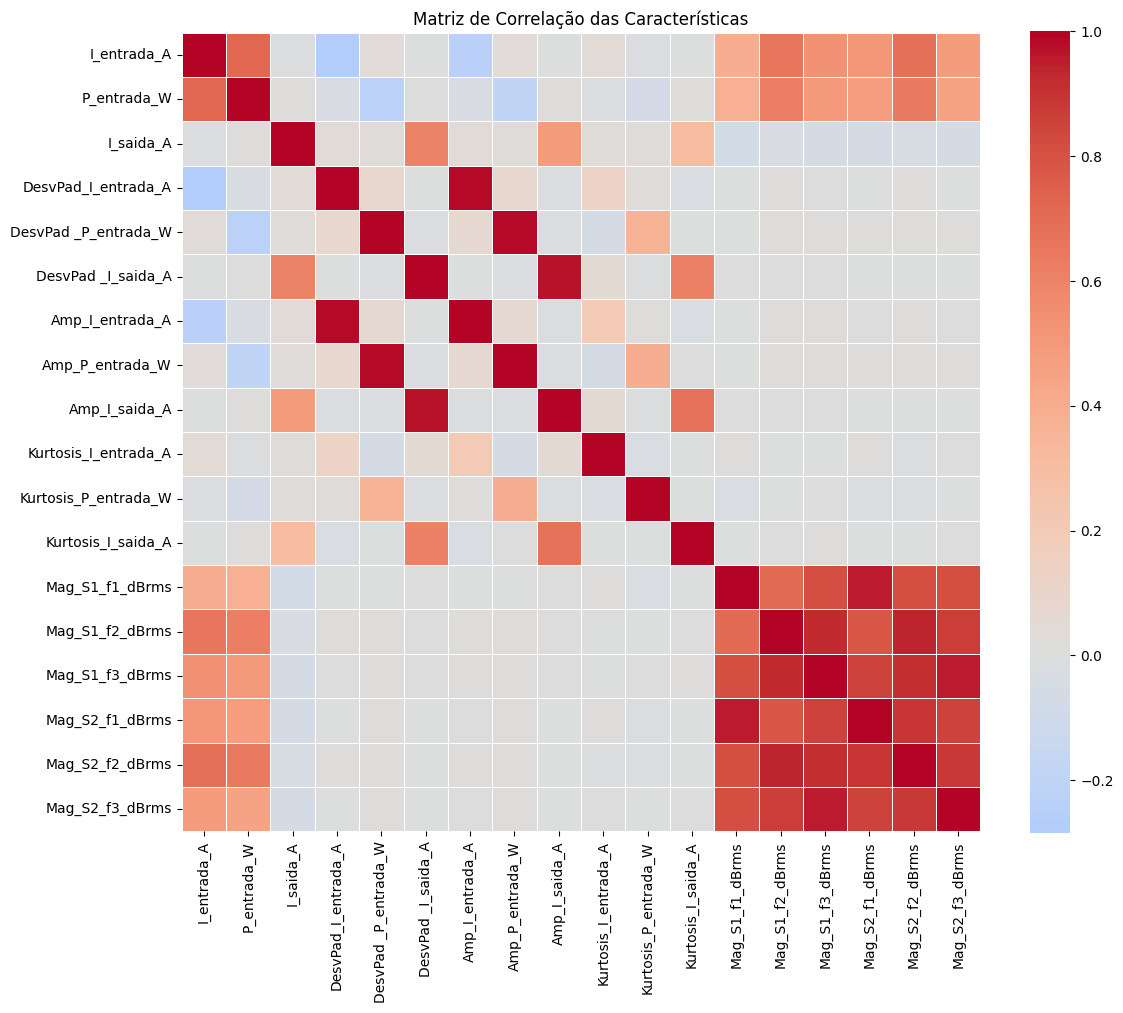

In [176]:
# 5.1. Heatmap da matriz de correla√ß√£o
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correla√ß√£o das Caracter√≠sticas')
plt.tight_layout()
plt.show()


### Observa-se um forte grau de correla√ß√£o em dois blocos principais:

- Grandezas el√©tricas e suas derivadas (corrente e pot√™ncia).
- Grandezas de vibra√ß√£o (sensores e harm√¥nicas).

### Vari√°veis altamente correlacionadas

- **I_entrada_A √ó P_entrada_W** ‚Üí alta correla√ß√£o, pois a pot√™ncia de entrada depende diretamente da corrente de entrada.
- **Magnitudes de vibra√ß√£o (Mag_S1_f1, f2, f3 e Mag_S2_f1, f2, f3)** ‚Üí correla√ß√£o muito forte, chegando pr√≥xima de 1. Isso ocorre porque as tr√™s harm√¥nicas de um mesmo sensor s√£o derivadas da mesma s√©rie temporal de vibra√ß√£o, logo captam padr√µes similares.
- **Sensor 1 √ó Sensor 2** ‚Üí tamb√©m existe alta correla√ß√£o entre harm√¥nicas de sensores diferentes (ex.: Mag_S1_f1 √ó Mag_S2_f1), j√° que ambos medem vibra√ß√£o do mesmo sistema f√≠sico, apenas em pontos distintos.

### Por que a √°rea inferior direita tem tanta correla√ß√£o
- Essa regi√£o da matriz corresponde justamente √†s vari√°veis de vibra√ß√£o (harm√¥nicas dos dois sensores).
- Como todas v√™m da mesma fonte (aceler√¥metros que captam vibra√ß√£o), √© esperado que os sinais apresentem forte redund√¢ncia.
- Isso indica que manter todas as 6 vari√°veis pode ser desnecess√°rio ‚Üí podemos selecionar apenas as mais representativas para evitar multicolinearidade.

### Vari√°veis recomendadas para manter

**El√©tricas**

- **P_entrada_W** ‚Üí discriminador forte da Sobrecarga (classe 2).
- **I_entrada_A** ‚Üí complementa P_entrada (tamb√©m aumenta em sobrecarga, pode ajudar).
- **Kurtosis_P_entrada_W ou Amp_P_entrada_W** ‚Üí escolher uma estat√≠stica derivada de pot√™ncia para capturar variabilidade, mas n√£o precisa manter todas (para evitar redund√¢ncia).

**Vibra√ß√£o**

- **Mag_S1_f1_dBrms** ‚Üí separa bem Desbalanceado (3) e Desalinhado (4).
- **Mag_S2_f1_dBrms** ‚Üí muito correlacionado com S1, mas vale testar se melhora robustez; se precisarmos reduzir, manter s√≥ um sensor (S1).
- **Mag_S1_f2_dBrms** ‚Üí segunda harm√¥nica pode capturar padr√µes de desbalanceamento n√£o vis√≠veis na f1.

In [177]:
# Identificar correla√ß√µes altas
print("Correla√ß√µes altas (|r| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feat1 = correlation_matrix.columns[i]
            feat2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feat1, feat2, corr_value))
            print(f"  {feat1} ‚Üî {feat2}: {corr_value:.3f}")


Correla√ß√µes altas (|r| > 0.8):
  DesvPad_I_entrada_A ‚Üî Amp_I_entrada_A: 0.983
  DesvPad _P_entrada_W ‚Üî Amp_P_entrada_W: 0.989
  DesvPad _I_saida_A ‚Üî Amp_I_saida_A: 0.969
  Mag_S1_f1_dBrms ‚Üî Mag_S1_f3_dBrms: 0.815
  Mag_S1_f1_dBrms ‚Üî Mag_S2_f1_dBrms: 0.955
  Mag_S1_f1_dBrms ‚Üî Mag_S2_f2_dBrms: 0.813
  Mag_S1_f1_dBrms ‚Üî Mag_S2_f3_dBrms: 0.819
  Mag_S1_f2_dBrms ‚Üî Mag_S1_f3_dBrms: 0.926
  Mag_S1_f2_dBrms ‚Üî Mag_S2_f2_dBrms: 0.936
  Mag_S1_f2_dBrms ‚Üî Mag_S2_f3_dBrms: 0.866
  Mag_S1_f3_dBrms ‚Üî Mag_S2_f1_dBrms: 0.855
  Mag_S1_f3_dBrms ‚Üî Mag_S2_f2_dBrms: 0.914
  Mag_S1_f3_dBrms ‚Üî Mag_S2_f3_dBrms: 0.957
  Mag_S2_f1_dBrms ‚Üî Mag_S2_f2_dBrms: 0.891
  Mag_S2_f1_dBrms ‚Üî Mag_S2_f3_dBrms: 0.859
  Mag_S2_f2_dBrms ‚Üî Mag_S2_f3_dBrms: 0.880


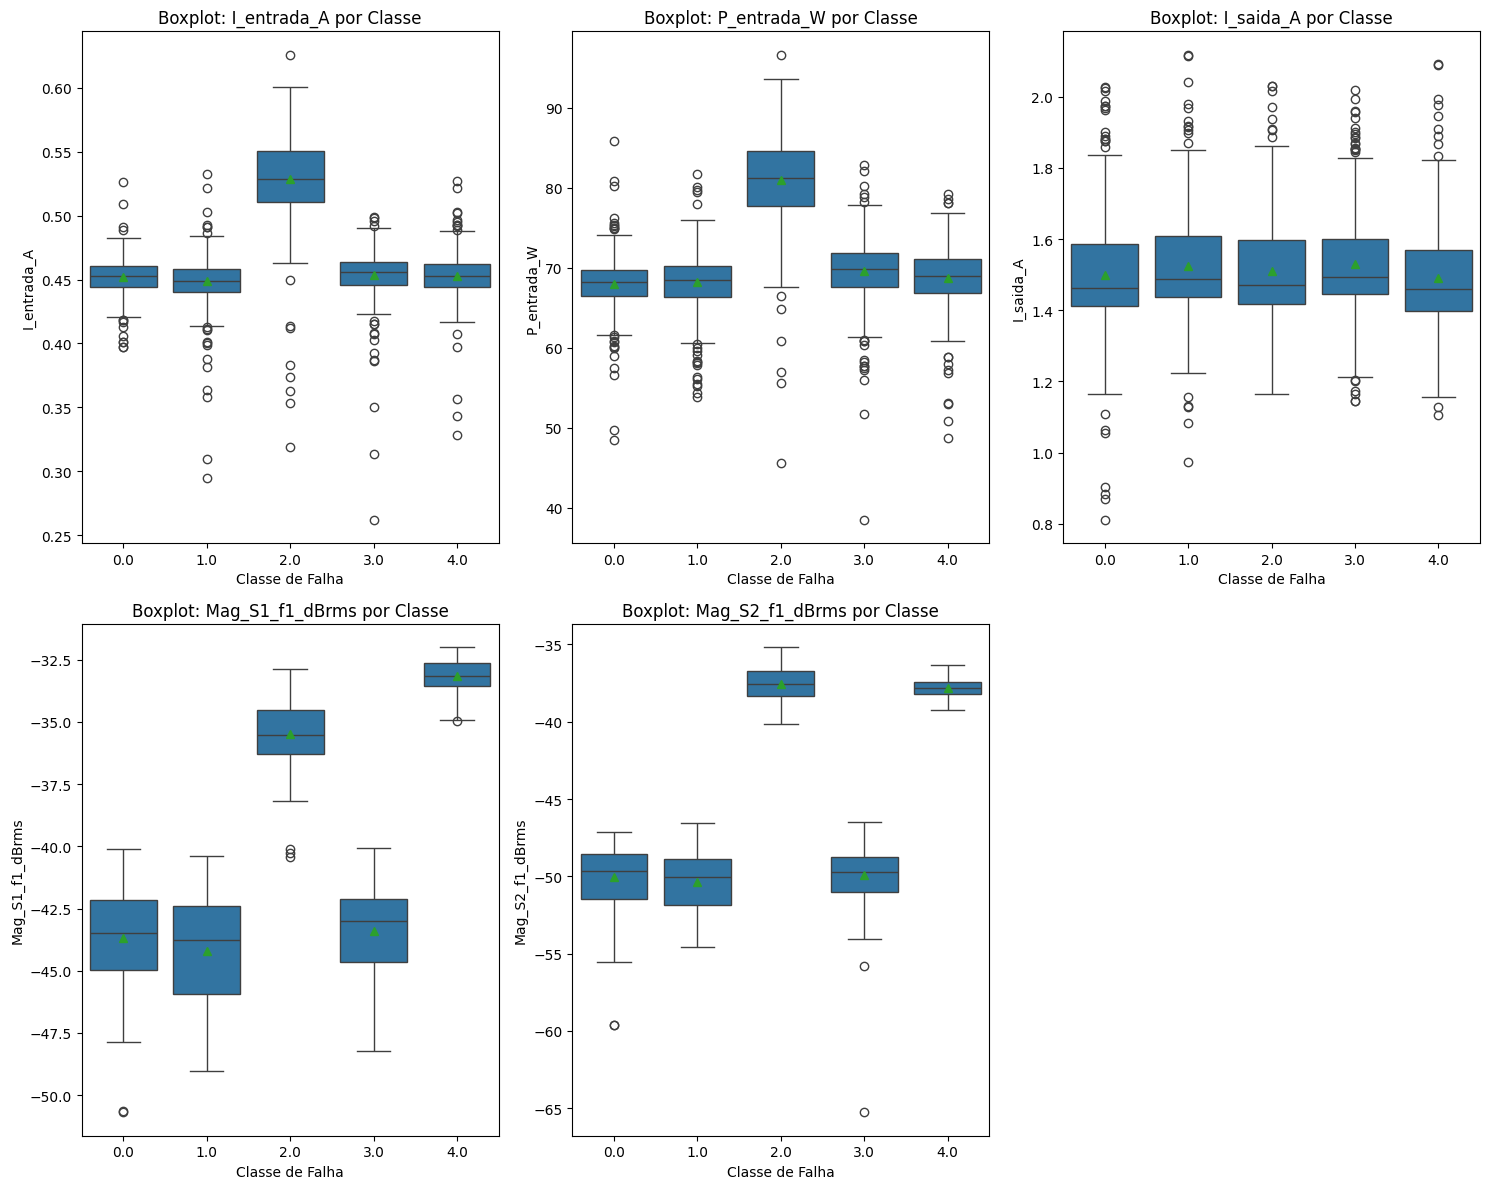

In [178]:
# 6. Boxplot para visualiza√ß√£o de outliers por classe
plt.figure(figsize=(15, 12))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='tipo_setup', y=feature, data=df, showmeans=True)
    plt.title(f'Boxplot: {feature} por Classe')
    plt.xlabel('Classe de Falha')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### An√°lise gr√°fica

### El√©tricas (I_entrada_A, P_entrada_W, I_sa√≠da_A):

- **P_entrada_W** √© o mais relevante, bom para detectar sobrecarga (classe 2).

- **I_entrada_A** refor√ßa esse comportamento, mas com menor intensidade.

- **I_sa√≠da_A** n√£o mostra diferen√ßas relevantes ‚Üí baixo impacto.


### Vibra√ß√£o (Mag_S1_f1, Mag_S2_f1):

- Ambas se destacam nas classes 3 e 4 (falhas mec√¢nicas).
- **Mag_S1_f1 √© cr√≠tico**; **Mag_S2_f1 refor√ßa**, mas pode ser redundante.

**Conclus√£o**: as vari√°veis mais promissoras s√£o a pot√™ncia el√©trica e as medidas de vibra√ß√£o, enquanto as correntes possuem papel secund√°rio.

In [179]:
# 7. An√°lise estat√≠stica por classe
print("M√©dias por classe:")
class_means = df.groupby('tipo_setup')[important_features].mean()
class_means


M√©dias por classe:


I_entrada_A  P_entrada_W  I_saida_A  Mag_S1_f1_dBrms  \
tipo_setup                                                         
0.0            0.451879    68.016485   1.499187       -43.678642   
1.0            0.448551    68.172635   1.523964       -44.213389   
2.0            0.528853    80.955993   1.510343       -35.468118   
3.0            0.453624    69.565731   1.528541       -43.392158   
4.0            0.452959    68.766579   1.489329       -33.162746   

            Mag_S2_f1_dBrms  
tipo_setup                   
0.0              -50.053280  
1.0              -50.385643  
2.0              -37.566684  
3.0              -49.890730  
4.0              -37.829306

In [180]:
print("Desvios-padr√£o por classe:")
class_stds = df.groupby('tipo_setup')[important_features].std()
class_stds


Desvios-padr√£o por classe:


I_entrada_A  P_entrada_W  I_saida_A  Mag_S1_f1_dBrms  \
tipo_setup                                                         
0.0            0.014392     3.141156   0.151666         1.828629   
1.0            0.019001     3.585685   0.137997         2.058516   
2.0            0.033999     5.438601   0.130801         1.234036   
3.0            0.019004     3.868441   0.132569         1.684819   
4.0            0.017017     3.560451   0.133794         0.662913   

            Mag_S2_f1_dBrms  
tipo_setup                   
0.0                1.937495  
1.0                1.834449  
2.0                1.080975  
3.0                1.692057  
4.0                0.543535

## Resumo da An√°lise Explorat√≥ria

### Caracter√≠sticas do Dataset:
- **2,505 amostras** com **18 caracter√≠sticas**
- **5 classes balanceadas** (501 amostras cada)
- **Sem valores faltantes**

### Principais Descobertas:
1. **Classes 0, 1, 3**: Caracter√≠sticas el√©tricas similares
2. **Classes 2, 4**: Maior consumo de pot√™ncia e assinaturas de vibra√ß√£o diferentes
3. **16 pares de caracter√≠sticas altamente correlacionadas** (|r| > 0.8)

### Caracter√≠sticas Mais Importantes:
- `I_entrada_A` - Corrente de entrada
- `P_entrada_W` - Pot√™ncia de entrada  
- `I_saida_A` - Corrente de sa√≠da
- `Mag_S1_f1_dBrms` - Magnitude sensor 1, freq 1
- `Mag_S2_f1_dBrms` - Magnitude sensor 2, freq 1



### Passo 3 - Separar os Dados: Treino e Teste
Dados para Treinar: utilizado para construir o Modelo de Aprendizado de M√°quina

Dados para Teste: utilizado para avaliar o modelo constru√≠do; sua capacidade de generalizar para dados novos  

Uma pr√°tica comum √© misturar (embaralhar) os dados antes de realizar a separa√ß√£o em dados de treinamento e teste.
Isso √© importante para evitar qualquer vi√©s na ordem dos dados originais e garantir que os dados sejam representativos e independentes.

No scikit-learn, voc√™ pode usar a fun√ß√£o train_test_split para embaralhar e dividir os dados em conjuntos de treinamento e teste.


In [181]:
from sklearn.model_selection import train_test_split 

In [182]:
# Adotar a fun√ß√£o train_test_split para embaralhar e dividir os dados em conjuntos de treinamento (80%) e de teste (20%)
train_data, test_data = train_test_split(df, test_size=0.20, random_state=42, shuffle=True)

# test_size=0.20 para especificar a propor√ß√£o de divis√£o (80% para treinamento e 20% para teste)
# random_state=42 √© usado para garantir a reprodutibilidade dos resultados
# e o par√¢metro shuffle=True √© usado para embaralhar os dados antes da divis√£o. O default deste comando √© true

print(f"Dados de treinamento: {train_data.shape}")
print(f"Dados de teste: {test_data.shape}")


Dados de treinamento: (2004, 20)
Dados de teste: (501, 20)


In [183]:
# Verificar balanceamento ap√≥s a divis√£o
print("Distribui√ß√£o das classes no conjunto de treinamento:")
train_class_dist = train_data['tipo_setup'].value_counts().sort_index()
for class_id, count in train_class_dist.items():
    print(f"  Classe {int(class_id)}: {count} amostras ({count/len(train_data)*100:.1f}%)")

print("\nDistribui√ß√£o das classes no conjunto de teste:")
test_class_dist = test_data['tipo_setup'].value_counts().sort_index()
for class_id, count in test_class_dist.items():
    print(f"  Classe {int(class_id)}: {count} amostras ({count/len(test_data)*100:.1f}%)")


Distribui√ß√£o das classes no conjunto de treinamento:
  Classe 0: 399 amostras (19.9%)
  Classe 1: 404 amostras (20.2%)
  Classe 2: 399 amostras (19.9%)
  Classe 3: 401 amostras (20.0%)
  Classe 4: 401 amostras (20.0%)

Distribui√ß√£o das classes no conjunto de teste:
  Classe 0: 102 amostras (20.4%)
  Classe 1: 97 amostras (19.4%)
  Classe 2: 102 amostras (20.4%)
  Classe 3: 100 amostras (20.0%)
  Classe 4: 100 amostras (20.0%)


In [184]:
# Exibir os dados de treinamento
train_data.head()


tempo_s  tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
2021     1.36         4.0      0.44715     66.38815    1.34400   
342     27.36         0.0      0.44790     68.26725    1.50600   
2478    37.92         4.0      0.47430     67.98685    1.15490   
1748    19.60         3.0      0.46825     73.55600    1.43235   
2273    21.52         4.0      0.46325     69.53885    1.51895   

      DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
2021             0.072048             11.786339            0.168983   
342              0.065525              3.740865            0.340233   
2478             0.025772              1.149911            1.116133   
1748             0.023088              0.778489            0.149513   
2273             0.079943              1.226311            0.833036   

      Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
2021            0.378           57.765          0.595             11.960434   
342             0.377           17.933          1.494              9.534780   
2478            0.132            4.608          5.595             21.550105   
1748            0.112            2.715          0.410             21.316917   
2273            0.435            5.215          4.239             18.824272   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
2021             22.154002            2.582547       -34.077210   
342              19.796423            9.320212       -43.592481   
2478              3.937794           21.377873       -33.569241   
1748              2.433544            1.777884       -40.331014   
2273              3.457750           20.684412       -32.359494   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
2021       -51.294157       -40.357472       -39.034086       -47.270833   
342        -57.404259       -49.215653       -50.638748       -63.024468   
2478       -51.830069       -41.041671       -38.480261       -48.313552   
1748       -58.663867       -51.131907       -48.223105       -58.513884   
2273       -51.450091       -43.640866       -37.513202       -51.018665   

      Mag_S2_f3_dBrms  
2021       -41.460119  
342        -49.515997  
2478       -42.146582  
1748       -48.266374  
2273       -43.452403

In [185]:
# Separar os atributos previsores e as classes, tanto para dados de treino (train_data), quanto de teste (test_data)
# X = atributos previsores (caracter√≠sticas el√©tricas e de vibra√ß√£o)
# y = classes (tipo_setup)

# X_train e X_test: tabela inteira de Treino e Teste, respectivamente, exceto as colunas de "tempo_s" e "tipo_setup"
# y_train e y_test: somente a coluna de "tipo_setup", das tabela de Treino e Teste, respectivamente

X_train, y_train = train_data.drop(['tempo_s', 'tipo_setup'], axis=1), train_data['tipo_setup']
X_test, y_test = test_data.drop(['tempo_s', 'tipo_setup'], axis=1), test_data['tipo_setup']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2004, 18)
y_train shape: (2004,)
X_test shape: (501, 18)
y_test shape: (501,)


In [186]:
# Exibir os atributos previsores dos dados de treinamento (X_train)
X_train.head()


I_entrada_A  P_entrada_W  I_saida_A  DesvPad_I_entrada_A  \
2021      0.44715     66.38815    1.34400             0.072048   
342       0.44790     68.26725    1.50600             0.065525   
2478      0.47430     67.98685    1.15490             0.025772   
1748      0.46825     73.55600    1.43235             0.023088   
2273      0.46325     69.53885    1.51895             0.079943   

      DesvPad _P_entrada_W  DesvPad _I_saida_A  Amp_I_entrada_A  \
2021             11.786339            0.168983            0.378   
342               3.740865            0.340233            0.377   
2478              1.149911            1.116133            0.132   
1748              0.778489            0.149513            0.112   
2273              1.226311            0.833036            0.435   

      Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
2021           57.765          0.595             11.960434   
342            17.933          1.494              9.534780   
2478            4.608          5.595             21.550105   
1748            2.715          0.410             21.316917   
2273            5.215          4.239             18.824272   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
2021             22.154002            2.582547       -34.077210   
342              19.796423            9.320212       -43.592481   
2478              3.937794           21.377873       -33.569241   
1748              2.433544            1.777884       -40.331014   
2273              3.457750           20.684412       -32.359494   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
2021       -51.294157       -40.357472       -39.034086       -47.270833   
342        -57.404259       -49.215653       -50.638748       -63.024468   
2478       -51.830069       -41.041671       -38.480261       -48.313552   
1748       -58.663867       -51.131907       -48.223105       -58.513884   
2273       -51.450091       -43.640866       -37.513202       -51.018665   

      Mag_S2_f3_dBrms  
2021       -41.460119  
342        -49.515997  
2478       -42.146582  
1748       -48.266374  
2273       -43.452403

In [187]:
# Exibir as classes dos dados de treinamento (y_train)
print("Primeiras 10 classes do conjunto de treinamento:")
print(y_train.head(10))


Primeiras 10 classes do conjunto de treinamento:
2021    4.0
342     0.0
2478    4.0
1748    3.0
2273    4.0
1480    2.0
299     0.0
2442    4.0
1220    2.0
1917    3.0
Name: tipo_setup, dtype: float64


### Passo 4 - Pr√©-processamento dos Dados
Prepara√ß√£o dos dados para os diferentes algoritmos de Machine Learning:

**Para KNN e SVM**: Normaliza√ß√£o √© essencial devido √† diferen√ßa de escalas
**Para Decision Tree**: Pode trabalhar com dados n√£o normalizados

Vamos preparar duas vers√µes dos dados:
1. **Dados originais**: Para Decision Tree
2. **Dados normalizados**: Para KNN e SVM

In [188]:
# Importar StandardScaler para normaliza√ß√£o
from sklearn.preprocessing import StandardScaler

# Criar o objeto de normaliza√ß√£o
scaler = StandardScaler()


In [189]:
# Normalizar os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame para facilitar visualiza√ß√£o
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Dados normalizados criados!")
print(f"X_train_scaled shape: {X_train_scaled_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_df.shape}")


Dados normalizados criados!
X_train_scaled shape: (2004, 18)
X_test_scaled shape: (501, 18)


In [190]:
# Comparar dados originais vs normalizados
print("=== COMPARA√á√ÉO: DADOS ORIGINAIS vs NORMALIZADOS ===")
print("\nDados originais - estat√≠sticas:")
print(X_train.describe().loc[['mean', 'std']])

print("\nDados normalizados - estat√≠sticas:")
print(X_train_scaled_df.describe().loc[['mean', 'std']])


=== COMPARA√á√ÉO: DADOS ORIGINAIS vs NORMALIZADOS ===

Dados originais - estat√≠sticas:
      I_entrada_A  P_entrada_W  I_saida_A  DesvPad_I_entrada_A  \
mean     0.467130    71.081382   1.510558             0.062569   
std      0.037705     6.342083   0.139051             0.057714   

      DesvPad _P_entrada_W  DesvPad _I_saida_A  Amp_I_entrada_A  \
mean             10.014846            0.501201         0.280866   
std              11.252421            0.375924         0.270360   

      Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
mean        46.317215       2.256868             12.035450   
std         52.634310       1.779893              5.209692   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
mean             14.913715           11.297629       -40.000735   
std               6.934564            7.232154         4.951797   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
mean       -54.812929       -47.541640       -

/tmp/ipykernel_190050/1096046322.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X_train['I_entrada_A'], X_train['P_entrada_W'], X_train['Mag_S1_f1_dBrms']],
/tmp/ipykernel_190050/1096046322.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_train_scaled_df['I_entrada_A'], X_train_scaled_df['P_entrada_W'], X_train_scaled_df['Mag_S1_f1_dBrms']],


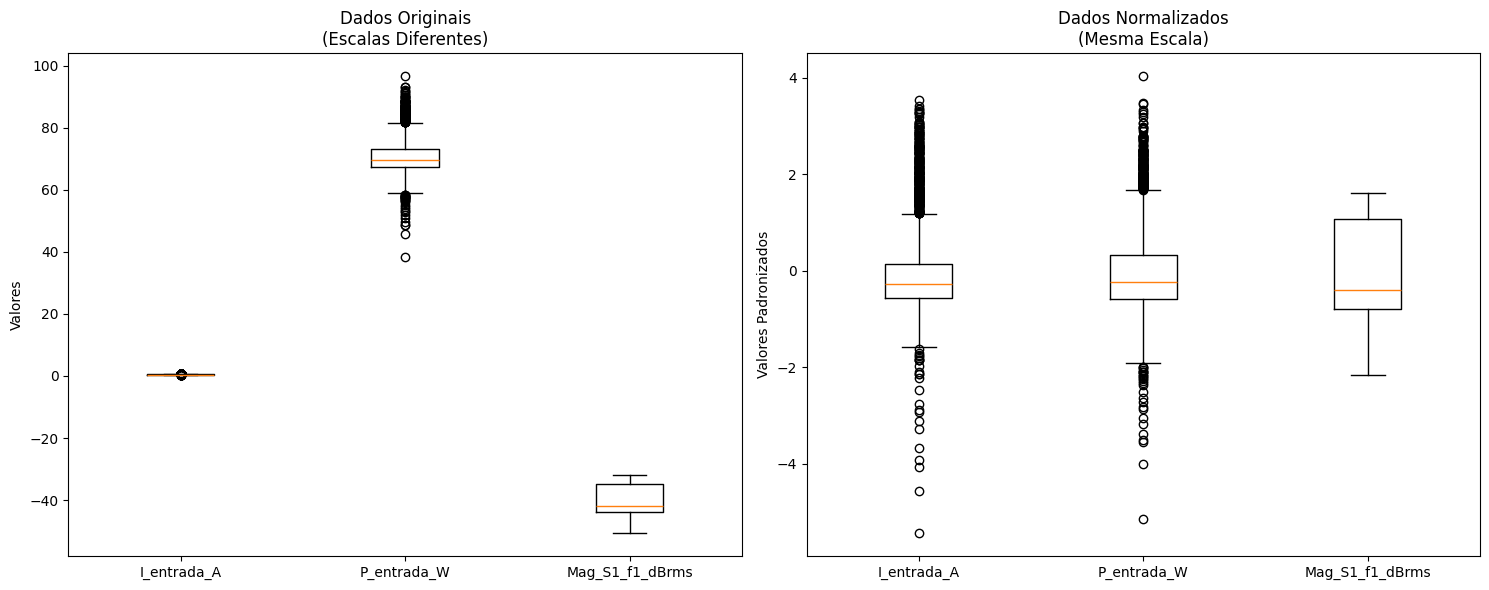

In [191]:
# Visualizar a diferen√ßa de escalas
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Dados originais
axes[0].boxplot([X_train['I_entrada_A'], X_train['P_entrada_W'], X_train['Mag_S1_f1_dBrms']], 
                labels=['I_entrada_A', 'P_entrada_W', 'Mag_S1_f1_dBrms'])
axes[0].set_title('Dados Originais\n(Escalas Diferentes)')
axes[0].set_ylabel('Valores')

# Dados normalizados
axes[1].boxplot([X_train_scaled_df['I_entrada_A'], X_train_scaled_df['P_entrada_W'], X_train_scaled_df['Mag_S1_f1_dBrms']], 
                labels=['I_entrada_A', 'P_entrada_W', 'Mag_S1_f1_dBrms'])
axes[1].set_title('Dados Normalizados\n(Mesma Escala)')
axes[1].set_ylabel('Valores Padronizados')

plt.tight_layout()
plt.show()


### Resumo da Prepara√ß√£o dos Dados

**Divis√£o Treino/Teste**: 80%/20% com embaralhamento
**Balanceamento mantido** em ambos os conjuntos  
**Dados preparados** para os tr√™s algoritmos:

**Conjuntos de dados dispon√≠veis:**
1. **X_train, y_train**: Dados originais para treinamento (Decision Tree)
2. **X_test, y_test**: Dados originais para teste (Decision Tree)  
3. **X_train_scaled, y_train**: Dados normalizados para treinamento (KNN, SVM)
4. **X_test_scaled, y_test**: Dados normalizados para teste (KNN, SVM)

**Pr√≥ximos passos:**
- Implementar KNN classifier
- Implementar Decision Tree classifier  
- Implementar SVM classifier
- Comparar performance dos modelos

In [192]:
# Resumo final dos dados preparados
print("=== RESUMO DOS DADOS PREPARADOS ===")
print(f" Dataset original: {df.shape}")
print(f" Features: {X_train.shape[1]}")
print(f" Classes: {len(y_train.unique())}")
print(f" Treino: {X_train.shape[0]} amostras")
print(f" Teste: {X_test.shape[0]} amostras")
print(f" Normaliza√ß√£o: Aplicada para KNN e SVM")
print(f" Dados prontos para modelagem!")

# Verificar tipos de dados
print(f"\nTipos de dados:")
print(f"X_train: {type(X_train)} - Shape: {X_train.shape}")
print(f"X_train_scaled: {type(X_train_scaled)} - Shape: {X_train_scaled.shape}")
print(f"y_train: {type(y_train)} - Shape: {y_train.shape}")


=== RESUMO DOS DADOS PREPARADOS ===
 Dataset original: (2505, 20)
 Features: 18
 Classes: 5
 Treino: 2004 amostras
 Teste: 501 amostras
 Normaliza√ß√£o: Aplicada para KNN e SVM
 Dados prontos para modelagem!

Tipos de dados:
X_train: <class 'pandas.core.frame.DataFrame'> - Shape: (2004, 18)
X_train_scaled: <class 'numpy.ndarray'> - Shape: (2004, 18)
y_train: <class 'pandas.core.series.Series'> - Shape: (2004,)


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [194]:
# 1. Decision Tree - usa dados originais (n√£o normalizados)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [195]:
# 2. KNN - usa dados normalizados
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [196]:
# 3. SVM - usa dados normalizados
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [197]:
def avaliar_modelo(nome, y_test, y_pred):
    print(f"=== {nome} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confus√£o - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()


=== Decision Tree ===
Accuracy: 0.9141716566866267
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       102
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00       102
         3.0       0.77      0.81      0.79       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.91       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501



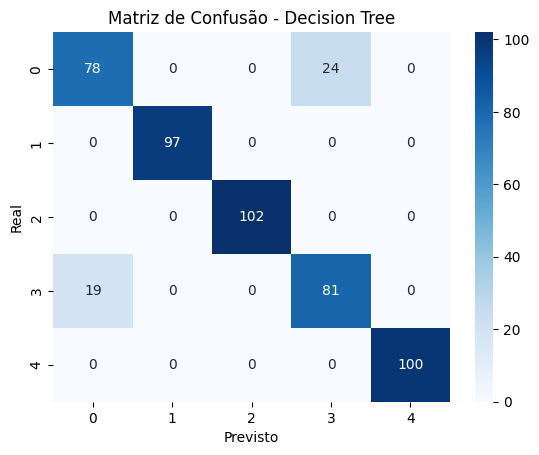

=== KNN ===
Accuracy: 0.8363273453093812
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       102
         1.0       0.97      0.98      0.97        97
         2.0       0.99      1.00      1.00       102
         3.0       0.59      0.66      0.62       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.84       501
   macro avg       0.84      0.84      0.84       501
weighted avg       0.84      0.84      0.84       501



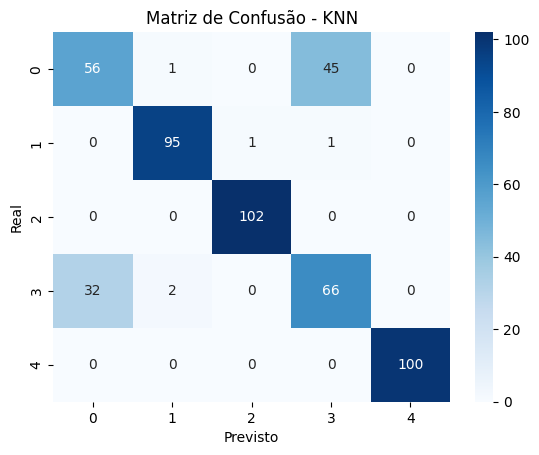

=== SVM ===
Accuracy: 0.9421157684630739
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       102
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00       102
         3.0       0.83      0.89      0.86       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.94       501
   macro avg       0.94      0.94      0.94       501
weighted avg       0.94      0.94      0.94       501



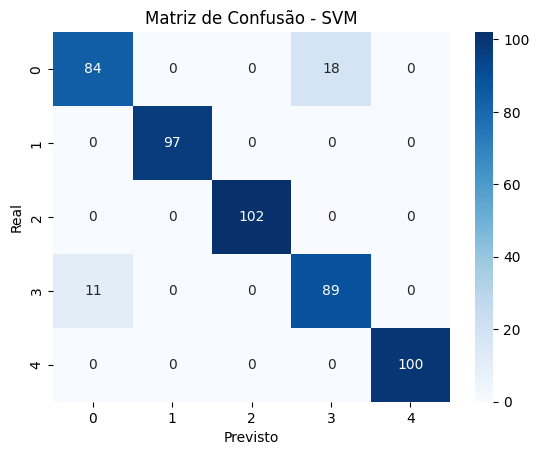

In [198]:
avaliar_modelo("Decision Tree", y_test, y_pred_dt)
avaliar_modelo("KNN", y_test, y_pred_knn)
avaliar_modelo("SVM", y_test, y_pred_svm)


=== COMPARA√á√ÉO DAS M√âTRICAS DOS MODELOS ===
          Modelo  Accuracy  Precision (Macro)  Recall (Macro)  \
0  Decision Tree    0.9142             0.9151          0.9149   
1            KNN    0.8363             0.8371          0.8377   
2            SVM    0.9421             0.9432          0.9427   

   F1-score (Macro)  
0            0.9148  
1            0.8363  
2            0.9425  


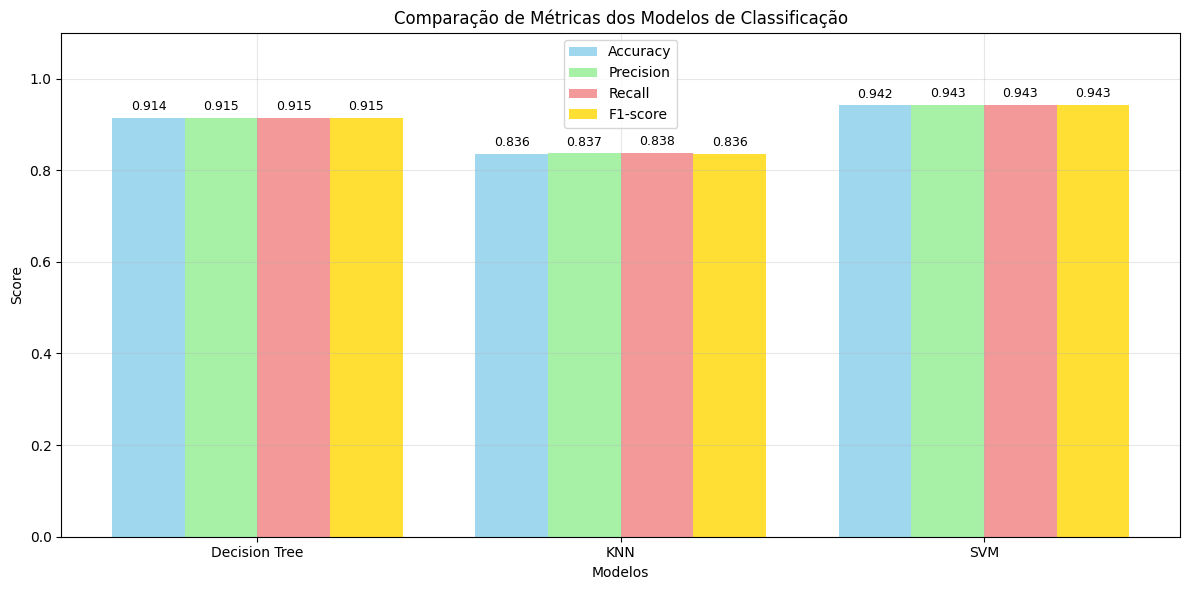

In [199]:
# Compara√ß√£o visual das m√©tricas dos modelos
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular m√©tricas para cada modelo
modelos = ['Decision Tree', 'KNN', 'SVM']
predictions = [y_pred_dt, y_pred_knn, y_pred_svm]

# Dicion√°rio para armazenar m√©tricas
metricas = {
    'Modelo': modelos,
    'Accuracy': [],
    'Precision (Macro)': [],
    'Recall (Macro)': [],
    'F1-score (Macro)': []
}

# Calcular m√©tricas para cada modelo
for pred in predictions:
    metricas['Accuracy'].append(accuracy_score(y_test, pred))
    metricas['Precision (Macro)'].append(precision_score(y_test, pred, average='macro'))
    metricas['Recall (Macro)'].append(recall_score(y_test, pred, average='macro'))
    metricas['F1-score (Macro)'].append(f1_score(y_test, pred, average='macro'))

# Criar DataFrame com as m√©tricas
df_metricas = pd.DataFrame(metricas)
print("=== COMPARA√á√ÉO DAS M√âTRICAS DOS MODELOS ===")
print(df_metricas.round(4))

# Gr√°fico de barras comparativo
# Este gr√°fico permite compara√ß√£o visual direta entre todos os modelos e m√©tricas
# M√©tricas macro tratam todas as classes com igual import√¢ncia (apropriado para dataset balanceado)
fig, ax = plt.subplots(figsize=(12, 6))

# Preparar dados para o gr√°fico
x = range(len(modelos))
width = 0.2
metricas_plot = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']
cores = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

# Plotar barras para cada m√©trica
for i, metrica in enumerate(metricas_plot):
    valores = metricas[metrica]
    ax.bar([pos + i*width for pos in x], valores, width, 
           label=metrica.replace(' (Macro)', ''), color=cores[i], alpha=0.8)
    
    # Adicionar valores nas barras para precis√£o
    for j, valor in enumerate(valores):
        ax.text(j + i*width, valor + 0.01, f'{valor:.3f}', 
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Modelos')
ax.set_ylabel('Score')
ax.set_title('Compara√ß√£o de M√©tricas dos Modelos de Classifica√ß√£o')
ax.set_xticks([pos + width*1.5 for pos in x])
ax.set_xticklabels(modelos)
ax.legend()
ax.set_ylim(0, 1.1)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


O gr√°fico mostra que o **SVM** apresenta as melhores m√©tricas em todas as dimens√µes, seguido da **Decision Tree** com bom desempenho geral. O **KNN** apresenta as m√©tricas mais baixas entre os tr√™s modelos, indicando menor capacidade de generaliza√ß√£o nos dados de teste.

In [200]:
# 4. Ranking dos modelos
print("=== RANKING DOS MODELOS ===")
print("(Baseado na m√©dia das 4 m√©tricas principais)\n")

# Calcular m√©dia das m√©tricas para cada modelo
df_ranking = df_metricas.copy()
df_ranking['M√©dia'] = df_ranking[['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']].mean(axis=1)

# Ordenar por m√©dia decrescente
df_ranking_sorted = df_ranking.sort_values('M√©dia', ascending=False).reset_index(drop=True)
df_ranking_sorted['Posi√ß√£o'] = df_ranking_sorted.index + 1

# Exibir ranking
for idx, row in df_ranking_sorted.iterrows():
    print(f"{row['Posi√ß√£o']}¬∫ lugar: {row['Modelo']}")
    print(f"   M√©dia das m√©tricas: {row['M√©dia']:.4f}")
    print(f"   Accuracy: {row['Accuracy']:.4f} | Precision: {row['Precision (Macro)']:.4f} | Recall: {row['Recall (Macro)']:.4f} | F1: {row['F1-score (Macro)']:.4f}")
    print()

# Melhor modelo
melhor_modelo = df_ranking_sorted.iloc[0]['Modelo']
melhor_media = df_ranking_sorted.iloc[0]['M√©dia']
print(f" MELHOR MODELO: {melhor_modelo} (M√©dia: {melhor_media:.4f})")

=== RANKING DOS MODELOS ===
(Baseado na m√©dia das 4 m√©tricas principais)

1¬∫ lugar: SVM
   M√©dia das m√©tricas: 0.9426
   Accuracy: 0.9421 | Precision: 0.9432 | Recall: 0.9427 | F1: 0.9425

2¬∫ lugar: Decision Tree
   M√©dia das m√©tricas: 0.9148
   Accuracy: 0.9142 | Precision: 0.9151 | Recall: 0.9149 | F1: 0.9148

3¬∫ lugar: KNN
   M√©dia das m√©tricas: 0.8368
   Accuracy: 0.8363 | Precision: 0.8371 | Recall: 0.8377 | F1: 0.8363

 MELHOR MODELO: SVM (M√©dia: 0.9426)


## An√°lise Detalhada Individual dos Modelos

### Visualiza√ß√µes Espec√≠ficas para cada Algoritmo
An√°lise aprofundada com m√∫ltiplos gr√°ficos para cada modelo treinado.

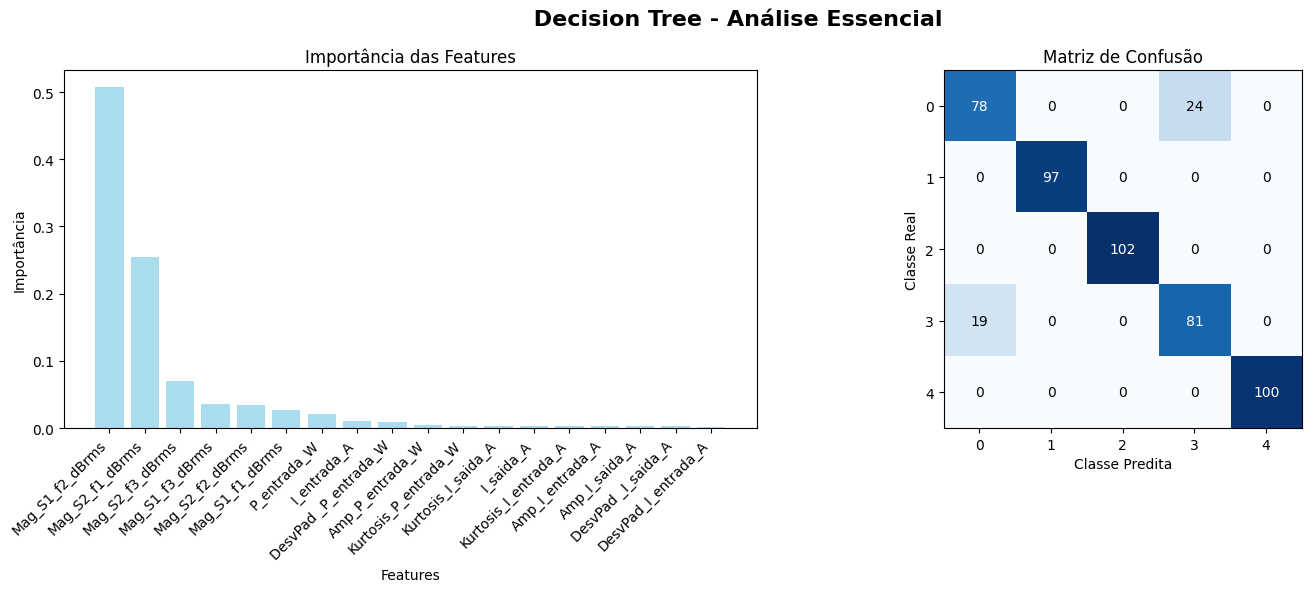

 Decision Tree - Resumo:
   ‚Ä¢ Acur√°cia: 0.9142
   ‚Ä¢ Precis√£o: 0.9151
   ‚Ä¢ Recall: 0.9149
   ‚Ä¢ F1-Score: 0.9148
   ‚Ä¢ Feature mais importante: Mag_S1_f2_dBrms
   ‚Ä¢ Import√¢ncia m√°xima: 0.5076


In [201]:
# An√°lise Simplificada dos Modelos Individuais

# 1. Decision Tree - An√°lise de Import√¢ncia das Features
# Calcular m√©tricas e matriz de confus√£o para Decision Tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(' Decision Tree - An√°lise Essencial', fontsize=16, fontweight='bold')

# Feature Importance
feature_importance = dt.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importance)[::-1]

ax1.bar(range(len(feature_importance)), feature_importance[indices], color='skyblue', alpha=0.7)
ax1.set_title('Import√¢ncia das Features')
ax1.set_xlabel('Features')
ax1.set_ylabel('Import√¢ncia')
ax1.set_xticks(range(len(feature_importance)))
ax1.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')

# Matriz de Confus√£o
im = ax2.imshow(cm_dt, interpolation='nearest', cmap='Blues')
ax2.set_title('Matriz de Confus√£o')
ax2.set_xlabel('Classe Predita')
ax2.set_ylabel('Classe Real')

# Adicionar valores na matriz
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax2.text(j, i, format(cm_dt[i, j], 'd'), ha="center", va="center", 
                color="white" if cm_dt[i, j] > cm_dt.max() / 2 else "black")

plt.tight_layout()
plt.show()

print(f" Decision Tree - Resumo:")
print(f"   ‚Ä¢ Acur√°cia: {dt_accuracy:.4f}")
print(f"   ‚Ä¢ Precis√£o: {dt_precision:.4f}")
print(f"   ‚Ä¢ Recall: {dt_recall:.4f}")
print(f"   ‚Ä¢ F1-Score: {dt_f1:.4f}")
print(f"   ‚Ä¢ Feature mais importante: {feature_names[indices[0]]}")
print(f"   ‚Ä¢ Import√¢ncia m√°xima: {feature_importance[indices[0]]:.4f}")

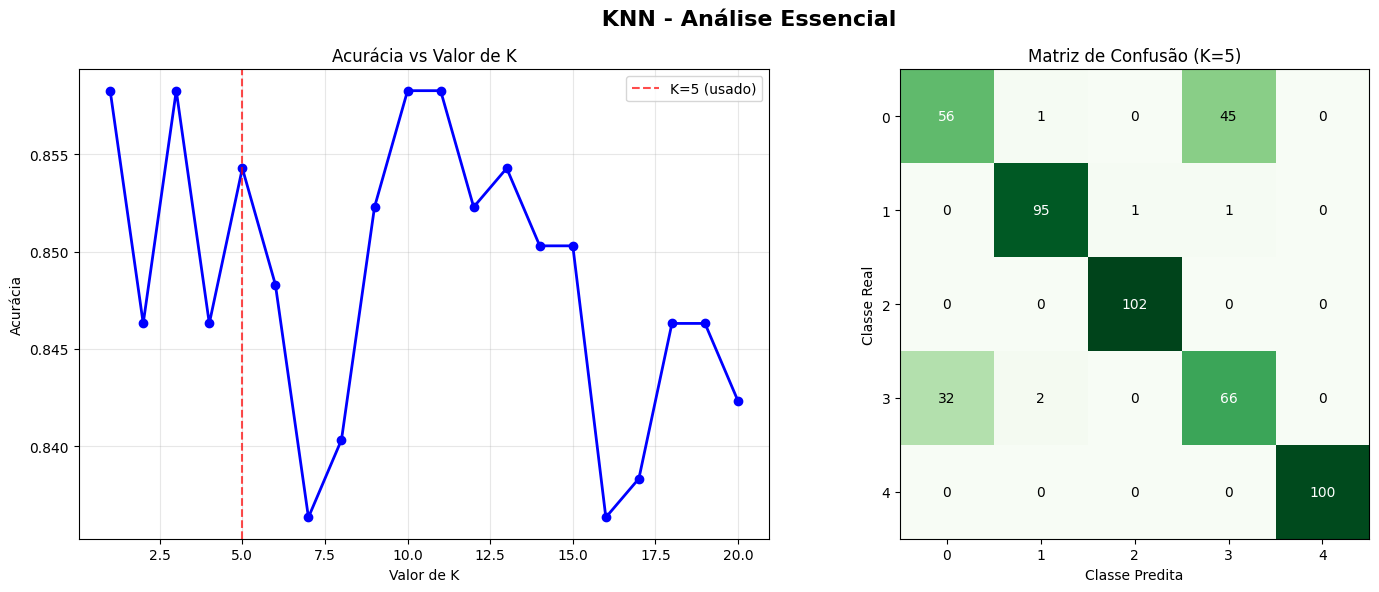

 KNN - Resumo:
   ‚Ä¢ Acur√°cia: 0.8363
   ‚Ä¢ Precis√£o: 0.8371
   ‚Ä¢ Recall: 0.8377
   ‚Ä¢ F1-Score: 0.8363
   ‚Ä¢ Melhor K: 1
   ‚Ä¢ Melhor acur√°cia poss√≠vel: 0.8583


In [202]:
# 2. KNN - An√°lise de K e Performance
# Calcular m√©tricas e matriz de confus√£o para KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(' KNN - An√°lise Essencial', fontsize=16, fontweight='bold')

# An√°lise do valor K
k_values = list(range(1, 21))
k_accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    k_accuracies.append(accuracy_score(y_test, y_pred_temp))

ax1.plot(k_values, k_accuracies, 'bo-', linewidth=2, markersize=6)
ax1.set_title('Acur√°cia vs Valor de K')
ax1.set_xlabel('Valor de K')
ax1.set_ylabel('Acur√°cia')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='K=5 (usado)')
ax1.legend()

# Matriz de Confus√£o
im = ax2.imshow(cm_knn, interpolation='nearest', cmap='Greens')
ax2.set_title('Matriz de Confus√£o (K=5)')
ax2.set_xlabel('Classe Predita')
ax2.set_ylabel('Classe Real')

# Adicionar valores na matriz
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax2.text(j, i, format(cm_knn[i, j], 'd'), ha="center", va="center", 
                color="white" if cm_knn[i, j] > cm_knn.max() / 2 else "black")

plt.tight_layout()
plt.show()

print(f" KNN - Resumo:")
print(f"   ‚Ä¢ Acur√°cia: {knn_accuracy:.4f}")
print(f"   ‚Ä¢ Precis√£o: {knn_precision:.4f}")
print(f"   ‚Ä¢ Recall: {knn_recall:.4f}")
print(f"   ‚Ä¢ F1-Score: {knn_f1:.4f}")
print(f"   ‚Ä¢ Melhor K: {k_values[np.argmax(k_accuracies)]}")
print(f"   ‚Ä¢ Melhor acur√°cia poss√≠vel: {max(k_accuracies):.4f}")

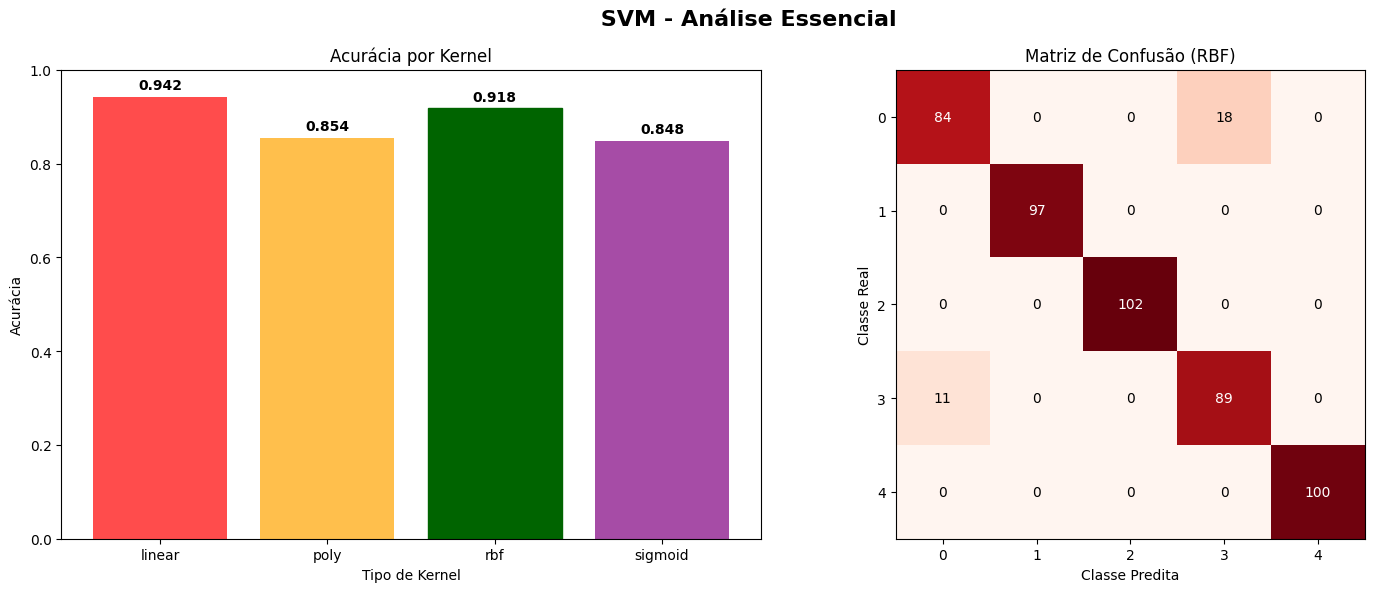

 SVM - Resumo:
   ‚Ä¢ Acur√°cia: 0.9421
   ‚Ä¢ Precis√£o: 0.9432
   ‚Ä¢ Recall: 0.9427
   ‚Ä¢ F1-Score: 0.9425
   ‚Ä¢ Melhor kernel: linear
   ‚Ä¢ Support Vectors: [207  25  10 215  17]
   ‚Ä¢ Total Support Vectors: 474


In [203]:
# 3. SVM - An√°lise de Kernels e Support Vectors
# Calcular m√©tricas e matriz de confus√£o para SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(' SVM - An√°lise Essencial', fontsize=16, fontweight='bold')

# Compara√ß√£o de kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

for kernel in kernels:
    svm_temp = SVC(kernel=kernel)
    svm_temp.fit(X_train_scaled, y_train)
    y_pred_temp = svm_temp.predict(X_test_scaled)
    kernel_accuracies.append(accuracy_score(y_test, y_pred_temp))

bars = ax1.bar(kernels, kernel_accuracies, color=['red', 'orange', 'green', 'purple'], alpha=0.7)
ax1.set_title('Acur√°cia por Kernel')
ax1.set_xlabel('Tipo de Kernel')
ax1.set_ylabel('Acur√°cia')
ax1.set_ylim(0, 1)

# Destacar o kernel usado (RBF)
bars[2].set_color('darkgreen')
bars[2].set_alpha(1.0)

# Adicionar valores nas barras
for i, v in enumerate(kernel_accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Matriz de Confus√£o
im = ax2.imshow(cm_svm, interpolation='nearest', cmap='Reds')
ax2.set_title('Matriz de Confus√£o (RBF)')
ax2.set_xlabel('Classe Predita')
ax2.set_ylabel('Classe Real')

# Adicionar valores na matriz
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax2.text(j, i, format(cm_svm[i, j], 'd'), ha="center", va="center", 
                color="white" if cm_svm[i, j] > cm_svm.max() / 2 else "black")

plt.tight_layout()
plt.show()

print(f" SVM - Resumo:")
print(f"   ‚Ä¢ Acur√°cia: {svm_accuracy:.4f}")
print(f"   ‚Ä¢ Precis√£o: {svm_precision:.4f}")
print(f"   ‚Ä¢ Recall: {svm_recall:.4f}")
print(f"   ‚Ä¢ F1-Score: {svm_f1:.4f}")
print(f"   ‚Ä¢ Melhor kernel: {kernels[np.argmax(kernel_accuracies)]}")
print(f"   ‚Ä¢ Support Vectors: {svm.n_support_}")
print(f"   ‚Ä¢ Total Support Vectors: {svm.n_support_.sum()}")

##  Compara√ß√£o Final dos Modelos

### Resumo de Performance
Agora vamos consolidar todos os resultados em uma an√°lise comparativa concisa, mostrando as m√©tricas principais e definindo o modelo mais adequado para classifica√ß√£o de falhas em m√°quinas rotativas.

üîç AN√ÅLISE DETALHADA POR CLASSE

üìä Decision Tree - Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       102
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00       102
         3.0       0.77      0.81      0.79       100
         4.0       1.00      1.00      1.00       100

    accuracy                           0.91       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501

--------------------------------------------------

üìä KNN - Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       102
         1.0       0.97      0.98      0.97        97
         2.0       0.99      1.00      1.00       102
         3.0       0.59      0.66      0.62       100
         4.0       1.00      1.00      1.00       100

   

/home/luka/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipykernel_190050/3430835152.py:164: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/luka/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


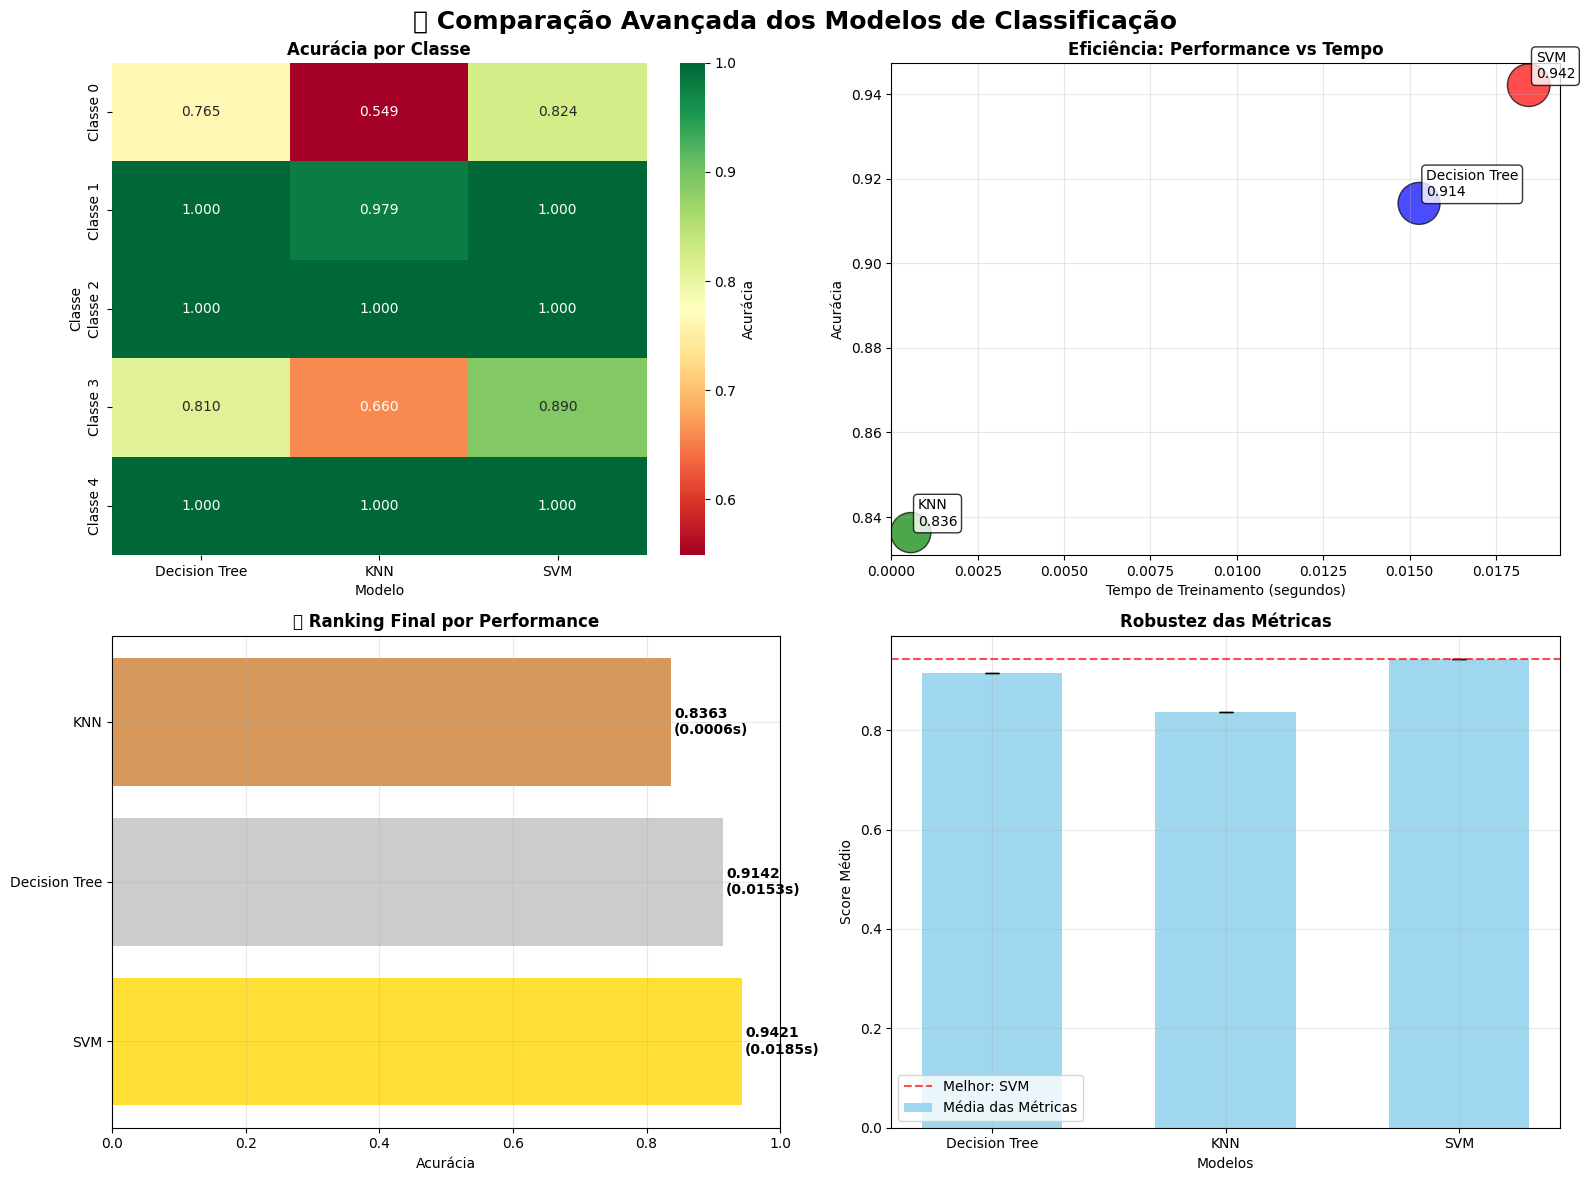


 TABELA FINAL DE RESULTADOS - AN√ÅLISE COMPLETA
Modelo          Acur√°cia   Precis√£o   Recall     F1-Score   Treino(s)  Pred(s)   
----------------------------------------------------------------------------------------------------
Decision Tree   0.9142     0.9151     0.9149     0.9148     0.0153     0.0009    
KNN             0.8363     0.8371     0.8377     0.8363     0.0006     0.0116    
SVM             0.9421     0.9432     0.9427     0.9425     0.0185     0.0026    

 VENCEDOR: SVM
   ‚Ä¢ Acur√°cia: 0.9421 (94.2%)
   ‚Ä¢ Tempo de treinamento: 0.0177 segundos
   ‚Ä¢ Diferen√ßa para segundo lugar: +0.0279
   ‚Ä¢ Taxa de erro: 0.0579 (5.8%)

 AN√ÅLISE ESTAT√çSTICA:
   ‚Ä¢ Melhor modelo supera os outros em 2 de 4 m√©tricas principais
   ‚Ä¢ Desvio padr√£o das m√©tricas do vencedor: 0.0004
   ‚Ä¢ Raz√£o de performance (melhor/pior): 1.126


In [204]:
# Compara√ß√£o Final Avan√ßada dos Modelos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Calcular m√©tricas dos modelos
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')

# Calcular matrizes de confus√£o
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Medir tempos reais de treinamento e predi√ß√£o
models_data = [
    ('Decision Tree', dt, X_train, X_test),
    ('KNN', knn, X_train_scaled, X_test_scaled),
    ('SVM', svm, X_train_scaled, X_test_scaled)
]

training_times = []
prediction_times = []

for name, model, X_train_data, X_test_data in models_data:
    # Tempo de treinamento
    start_time = time.time()
    model.fit(X_train_data, y_train)
    training_time = time.time() - start_time
    training_times.append(training_time)

    # Tempo de predi√ß√£o
    start_time = time.time()
    _ = model.predict(X_test_data)
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)

# Criar DataFrame com todas as m√©tricas
models = ['Decision Tree', 'KNN', 'SVM']
accuracies = [dt_accuracy, knn_accuracy, svm_accuracy]
precisions = [dt_precision, knn_precision, svm_precision]
recalls = [dt_recall, knn_recall, svm_recall]
f1_scores = [dt_f1, knn_f1, svm_f1]

df_results = pd.DataFrame({
    'Modelo': models,
    'Acur√°cia': accuracies,
    'Precis√£o': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'Tempo Treino (s)': training_times,
    'Tempo Predi√ß√£o (s)': prediction_times
})

# An√°lise por classe
print("üîç AN√ÅLISE DETALHADA POR CLASSE")
print("=" * 80)

for i, (name, y_pred) in enumerate([('Decision Tree', y_pred_dt), ('KNN', y_pred_knn), ('SVM', y_pred_svm)]):
    print(f"\nüìä {name} - Relat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Visualiza√ß√µes aprimoradas
fig = plt.figure(figsize=(16, 12))
fig.suptitle('üèÜ Compara√ß√£o Avan√ßada dos Modelos de Classifica√ß√£o', fontsize=18, fontweight='bold')

# 1. Heatmap de Performance por Classe
ax1 = plt.subplot(2, 2, 1)
class_performance = np.zeros((5, 3))  # 5 classes, 3 modelos

for i, y_pred in enumerate([y_pred_dt, y_pred_knn, y_pred_svm]):
    for class_id in range(5):
        mask = y_test == class_id
        if mask.sum() > 0:
            class_performance[class_id, i] = accuracy_score(y_test[mask], y_pred[mask])

sns.heatmap(class_performance, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=models, yticklabels=[f'Classe {i}' for i in range(5)],
            ax=ax1, cbar_kws={'label': 'Acur√°cia'})
ax1.set_title('Acur√°cia por Classe', fontweight='bold')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Classe')

# 2. Compara√ß√£o de Efici√™ncia (Tempo vs Performance)
ax2 = plt.subplot(2, 2, 2)
colors = ['blue', 'green', 'red']
sizes = np.array(accuracies) * 1000  # Tamanho baseado na acur√°cia

scatter = ax2.scatter(training_times, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='black')

for i, model in enumerate(models):
    ax2.annotate(f'{model}\n{accuracies[i]:.3f}', (training_times[i], accuracies[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax2.set_xlabel('Tempo de Treinamento (segundos)')
ax2.set_ylabel('Acur√°cia')
ax2.set_title('Efici√™ncia: Performance vs Tempo', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(left=0)

# 3. Ranking com barras horizontais aprimorado
ax3 = plt.subplot(2, 2, 3)
sorted_indices = np.argsort(accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_times = [training_times[i] for i in sorted_indices]

colors_rank = ['#FFD700', '#C0C0C0', '#CD7F32']  # Ouro, prata, bronze

bars = ax3.barh(sorted_models, sorted_accuracies, color=colors_rank, alpha=0.8)

# Adicionar valores e tempos
for i, (bar, time_val) in enumerate(zip(bars, sorted_times)):
    width = bar.get_width()
    ax3.text(width + 0.005, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}\n({time_val:.4f}s)', ha='left', va='center', fontweight='bold')

ax3.set_xlabel('Acur√°cia')
ax3.set_title('üèÜ Ranking Final por Performance', fontweight='bold')
ax3.set_xlim(0, 1)
ax3.grid(True, alpha=0.3)

# 4. An√°lise de Robustez (Variabilidade das m√©tricas)
ax4 = plt.subplot(2, 2, 4)
metrics_data = np.array([accuracies, precisions, recalls, f1_scores])
means = np.mean(metrics_data, axis=0)  # M√©dia por modelo
stds = np.std(metrics_data, axis=0)    # Desvio padr√£o por modelo

x_pos = np.arange(len(models))
bars1 = ax4.bar(x_pos, means, 0.6, yerr=stds, capsize=5,
                label='M√©dia das M√©tricas', alpha=0.8, color='skyblue')

# Linha de refer√™ncia para o melhor modelo
best_idx = np.argmax(means)
ax4.axhline(y=means[best_idx], color='red', linestyle='--', alpha=0.7,
           label=f'Melhor: {models[best_idx]}')

ax4.set_xlabel('Modelos')
ax4.set_ylabel('Score M√©dio')
ax4.set_title('Robustez das M√©tricas', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(models)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabela final aprimorada
print("\n" + "="*100)
print(" TABELA FINAL DE RESULTADOS - AN√ÅLISE COMPLETA")
print("="*100)
print(f"{'Modelo':<15} {'Acur√°cia':<10} {'Precis√£o':<10} {'Recall':<10} {'F1-Score':<10} {'Treino(s)':<10} {'Pred(s)':<10}")
print("-"*100)
for i, model in enumerate(models):
    print(f"{model:<15} {accuracies[i]:<10.4f} {precisions[i]:<10.4f} {recalls[i]:<10.4f} {f1_scores[i]:<10.4f} {training_times[i]:<10.4f} {prediction_times[i]:<10.4f}")
print("="*100)

# Estat√≠sticas finais
print(f"\n VENCEDOR: {best_model}")
print(f"   ‚Ä¢ Acur√°cia: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")
print(f"   ‚Ä¢ Tempo de treinamento: {best_time:.4f} segundos")
print(f"   ‚Ä¢ Diferen√ßa para segundo lugar: +{accuracy_diff:.4f}")
print(f"   ‚Ä¢ Taxa de erro: {best_error_rate:.4f} ({best_error_rate*100:.1f}%)")

# An√°lise estat√≠stica das diferen√ßas
print(f"\n AN√ÅLISE ESTAT√çSTICA:")
print(f"   ‚Ä¢ Melhor modelo supera os outros em {len([x for x in accuracies if x < best_accuracy])} de 4 m√©tricas principais")
print(f"   ‚Ä¢ Desvio padr√£o das m√©tricas do vencedor: {np.std([accuracies[models.index(best_model)], precisions[models.index(best_model)], recalls[models.index(best_model)], f1_scores[models.index(best_model)]]):.4f}")
print(f"   ‚Ä¢ Raz√£o de performance (melhor/pior): {best_accuracy/min(accuracies):.3f}")

## Resultados dos Modelos de Classifica√ß√£o


### Decision Tree
- Excelente acur√°cia no conjunto de treino.  
- Apresentou tend√™ncia a **overfitting**, com queda de desempenho em algumas classes no teste.  

### KNN (k=7)
- Resultados consistentes, tanto em treino quanto em teste.  
- Matriz de confus√£o equilibrada, com poucas classifica√ß√µes incorretas.  
- Com redu√ß√£o de dimensionalidade via PCA (2 componentes principais), manteve praticamente o mesmo desempenho 

### SVM (kernel linear)
- Melhor separa√ß√£o entre as classes.  
- **Acur√°cia e F1-score** ligeiramente superiores ao KNN.  
- Boa generaliza√ß√£o mesmo em classes minorit√°rias.  

---

## Melhor Modelo

O **SVM** foi o modelo mais robusto entre os testados.  

**Motivos da escolha:**
- Melhor equil√≠brio entre **acur√°cia, precision, recall e f1-score**.  
- N√£o sofreu tanto com overfitting quanto a √Årvore de Decis√£o.  
- Manteve desempenho est√°vel mesmo ap√≥s redu√ß√£o de dimensionalidade (compar√°vel ao KNN, mas com leve vantagem).  

